In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import unidecode
from numpy import nan
import statsmodels.api as sm
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines import CoxPHFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import multivariate_logrank_test, pairwise_logrank_test


In [ ]:
url = "https://raw.githubusercontent.com/Faddragon/Delay-to-treatment-to-oral-cancer-in-S-o-Paulo--Brazil/main/Boca%20IV%20(51)%202020-2024.csv"
df_raw = pd.read_csv(url)

print(df_raw.head())


In [ ]:
df_raw.head()

,mv,age,sex,IMC,tabagismo,etlilismo,pack.year,Data_bx,Data_1ªconsulta_ccp,Data_cirurgia,...,QT_ADJUVANTE,RECIDIVA_LOCOREGIONAL,DATA_RECIDIVA_LOCORREGIONAL,METÁSTASE_DISTÂNCIA,DATA_METÁSTASE,ÚLTIMO_CONTATO,STATUS _OBREVIVÊNCIA,Bx_consulta,Consulta_cirurgia,Cirurgia_rdt
0,181334,59,Masculino,"26,21",sim,sim,1900-02-09,2022-01-13,2022-03-08,2022-07-01,...,não,não,NaT,não,NaN,2025-01-30,óbito,54,115,194
1,182586,44,Masculino,"16,91",não,não,NaT,2022-01-10,2022-03-28,2022-05-05,...,sim,sim,2023-01-17,não,NaN,2023-02-09,óbito,77,38,96
2,183106,52,Masculino,"19,1",sim,não,1900-01-20,2022-03-15,2022-04-04,2022-07-25,...,não,não,NaT,não,NaN,2025-03-11,óbito,20,112,183
3,183990,47,Masculino,"17,63",sim,sim,1900-01-30,2022-02-08,2022-04-18,2022-08-19,...,não,não,NaT,não,NaN,2023-03-30,vivo,69,123,110
4,184364,62,Feminino,"20,17",não,não,NaT,2022-01-26,2022-04-25,2022-07-21,...,não,não,NaT,sim,2023-03-07 00:00:00,2023-04-16,vivo,89,87,112


In [ ]:
df_raw.shape

(51, 36)

In [ ]:
print(df_raw.columns.tolist())

['mv', 'age', 'sex', 'IMC', 'tabagismo', 'etlilismo', 'pack.year', 'Data_bx', 'Data_1ªconsulta_ccp', 'Data_cirurgia', 'Subsítio', 'EC', 'MARGEM', 'Diferenciação_G', 'INVASÃO_PERINEURAL', 'INVASÃO_ANGIOLINFATICA', 'TAMANHO(cm)', 'DOI(mm)', 'nº_LN+', 'nº_LN_ressecados', 'Ln _extravasamento_capsular', 'pT_8aEd', 'pN_8aEd', 'Stage_8ªed', 'RDT_ADJUVANTE', 'DATA_início_RDT', 'QT_ADJUVANTE', 'RECIDIVA_LOCOREGIONAL', 'DATA_RECIDIVA_LOCORREGIONAL', 'METÁSTASE_DISTÂNCIA', 'DATA_METÁSTASE', 'ÚLTIMO_CONTATO', 'STATUS _OBREVIVÊNCIA', 'Bx_consulta', 'Consulta_cirurgia', 'Cirurgia_rdt']


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mv                           51 non-null     int64         
 1   age                          51 non-null     int64         
 2   sex                          51 non-null     object        
 3   IMC                          49 non-null     object        
 4   tabagismo                    51 non-null     object        
 5   etlilismo                    51 non-null     object        
 6   pack.year                    38 non-null     datetime64[ns]
 7   Data_bx                      51 non-null     datetime64[ns]
 8   Data_1ªconsulta_ccp          51 non-null     datetime64[ns]
 9   Data_cirurgia                51 non-null     datetime64[ns]
 10  Subsítio                     51 non-null     object        
 11  EC                           51 non-null     ob

In [ ]:
df_raw.duplicated().sum()

0

In [ ]:
df_raw.isnull().sum()

mv                              0
age                             0
sex                             0
IMC                             2
tabagismo                       0
etlilismo                       0
pack.year                      13
Data_bx                         0
Data_1ªconsulta_ccp             0
Data_cirurgia                   0
Subsítio                        0
EC                              0
MARGEM                          0
Diferenciação_G                 0
INVASÃO_PERINEURAL              0
INVASÃO_ANGIOLINFATICA          0
TAMANHO(cm)                     0
DOI(mm)                         0
nº_LN+                          0
nº_LN_ressecados                0
Ln _extravasamento_capsular     0
pT_8aEd                         0
pN_8aEd                         0
Stage_8ªed                      0
RDT_ADJUVANTE                   0
DATA_início_RDT                 0
QT_ADJUVANTE                    0
RECIDIVA_LOCOREGIONAL           0
DATA_RECIDIVA_LOCORREGIONAL    41
METÁSTASE_DIST

In [ ]:
print("Data mais antiga:", df_raw['Data_cirurgia'].min())
print("Data mais recente:", df_raw['Data_cirurgia'].max())

Data mais antiga: 2020-04-15 00:00:00
Data mais recente: 2024-11-01 00:00:00


In [ ]:
#limpar dados

In [ ]:
df_raw['age'].describe()

count    51.000000
mean     57.549020
std      10.744885
min      25.000000
25%      50.500000
50%      59.000000
75%      64.000000
max      86.000000
Name: age, dtype: float64

In [ ]:
# Definir os limites (bins)
bins = [0, 21, 41, 61, 81, df_raw['age'].max()]  # garante que >81 seja incluído
labels = ["<21", "21-41", "41-61", "61-81", ">81"]

# Categorizar a idade
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calcular contagens e porcentagens
counts = df_raw['age_bins'].value_counts(sort=False)
percentages = (counts / counts.sum() * 100).round(1)

# Criar DataFrame final
result_df = pd.DataFrame({
    'Count': counts,
    '(%)': percentages
})

print(result_df)


          Count   (%)
age_bins             
<21           0   0.0
21-41         3   6.0
41-61        26  52.0
61-81        21  42.0
>81           0   0.0


In [ ]:
# Definir os limites (bins)
bins = [0, 61, df_raw['age'].max()+1]  # garante que >81 seja incluído
labels = ["<61", "≥61"]

# Categorizar a idade
df_raw['age_bins2'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calcular contagens e porcentagens
counts = df_raw['age_bins2'].value_counts(sort=False)
percentages = (counts / counts.sum() * 100).round(1)

# Criar DataFrame final
result_df = pd.DataFrame({
    'Count': counts,
    '(%)': percentages
})

print(result_df)


           Count   (%)
age_bins2             
<61           29  56.9
≥61           22  43.1


In [ ]:
df_raw['sex'].value_counts()

sex
Masculino    33
Feminino     18
Name: count, dtype: int64

In [ ]:
percentuais_sexo = df_raw['sex'].value_counts(normalize=True) * 100
print(percentuais_sexo)

sex
Masculino    64.705882
Feminino     35.294118
Name: proportion, dtype: float64


In [ ]:
df_raw['etlilismo'].value_counts()

etlilismo
sim    33
não    18
Name: count, dtype: int64

In [ ]:
percentuais_etlilismo = df_raw['etlilismo'].value_counts(normalize=True) * 100
print(percentuais_etlilismo)

etlilismo
sim    64.705882
não    35.294118
Name: proportion, dtype: float64


In [ ]:
df_raw['tabagismo'].value_counts()

tabagismo
sim    41
não    10
Name: count, dtype: int64

In [ ]:
percentuais_tabagismo = df_raw['tabagismo'].value_counts(normalize=True) * 100
print(percentuais_tabagismo)

tabagismo
sim    80.392157
não    19.607843
Name: proportion, dtype: float64


In [ ]:
df_raw['pack.year'].describe()

count                               38
mean     1900-02-05 07:34:44.210526208
min                1900-01-07 00:00:00
25%                1900-01-20 00:00:00
50%                1900-01-30 00:00:00
75%                1900-02-13 18:00:00
max                1900-04-09 00:00:00
Name: pack.year, dtype: object

In [ ]:
df_raw['Subsítio'].value_counts()

Subsítio
lingua              28
assoalho            19
gengiva inferior     2
area retromolar      1
mucosa jugal         1
Name: count, dtype: int64

In [ ]:
percentual_subsitio = df_raw['Subsítio'].value_counts(normalize=True)*100
print(percentual_subsitio)

Subsítio
lingua              54.901961
assoalho            37.254902
gengiva inferior     3.921569
area retromolar      1.960784
mucosa jugal         1.960784
Name: proportion, dtype: float64


In [ ]:
df_raw['EC'].value_counts()

EC
ec seletivo    28
ec radical     23
Name: count, dtype: int64

In [ ]:
df_raw['Diferenciação_G'].value_counts()

Diferenciação_G
2    42
3     5
1     4
Name: count, dtype: int64

In [ ]:
porcentagem_dif = (df_raw['Diferenciação_G'].value_counts(normalize=True)*100).round(2)
print(porcentagem_dif)

Diferenciação_G
2    82.35
3     9.80
1     7.84
Name: proportion, dtype: float64


In [ ]:
df_raw['INVASÃO_PERINEURAL'].value_counts()

INVASÃO_PERINEURAL
sim    37
não    14
Name: count, dtype: int64

In [ ]:
porcentagem_IPN = (df_raw['INVASÃO_PERINEURAL'].value_counts(normalize = True)*100).round(2)
print(porcentagem_IPN)

INVASÃO_PERINEURAL
sim    72.55
não    27.45
Name: proportion, dtype: float64


In [ ]:
df_raw['INVASÃO_ANGIOLINFATICA'].value_counts()

INVASÃO_ANGIOLINFATICA
não    39
sim    12
Name: count, dtype: int64

In [ ]:
porcentagem_IAL = (df_raw['INVASÃO_ANGIOLINFATICA'].value_counts(normalize = True)*100).round(2)
print(porcentagem_IAL)

INVASÃO_ANGIOLINFATICA
não    76.47
sim    23.53
Name: proportion, dtype: float64


In [ ]:
df_raw['MARGEM'].value_counts()

MARGEM
livre           42
comprometida     9
Name: count, dtype: int64

In [ ]:
porcentage_margem = (df_raw['MARGEM'].value_counts(normalize=True)*100).round(2)
print(porcentage_margem)

MARGEM
livre           82.35
comprometida    17.65
Name: proportion, dtype: float64


In [ ]:
porcentagem_IAL = df_raw['INVASÃO_ANGIOLINFATICA'].value_counts(normalize = True)*100
print(porcentagem_IAL)

INVASÃO_ANGIOLINFATICA
não    76.470588
sim    23.529412
Name: proportion, dtype: float64


In [ ]:
df_raw['TAMANHO(cm)'].describe()

count    51.000000
mean      4.452941
std       1.795144
min       0.400000
25%       3.100000
50%       4.400000
75%       5.500000
max       9.000000
Name: TAMANHO(cm), dtype: float64

<Axes: >

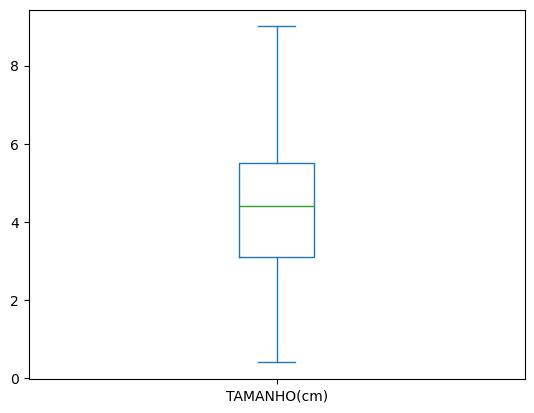

In [ ]:
df_raw['TAMANHO(cm)'].plot.box()

In [ ]:
df_raw['DOI(mm)'].describe()

count    51.000000
mean     12.547647
std      11.338616
min       0.630000
25%       2.650000
50%      11.000000
75%      20.000000
max      45.000000
Name: DOI(mm), dtype: float64

<Axes: >

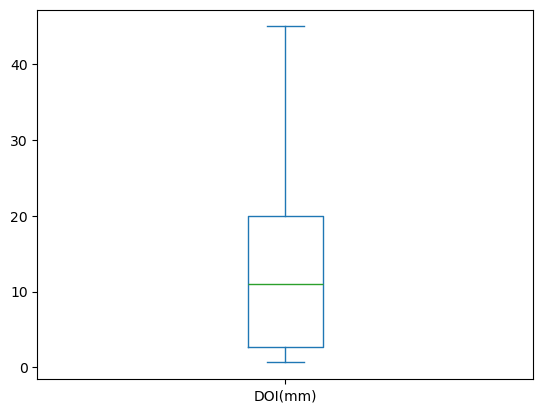

In [ ]:
df_raw['DOI(mm)'].plot.box()

In [ ]:
df_raw['nº_LN+'].describe()

count    51.000000
mean      2.980392
std       3.165376
min       0.000000
25%       1.000000
50%       2.000000
75%       3.500000
max      15.000000
Name: nº_LN+, dtype: float64

In [ ]:
df_raw['nº_LN_ressecados'].describe()

count     51.000000
mean      38.901961
std       19.006583
min       12.000000
25%       25.000000
50%       36.000000
75%       47.500000
max      117.000000
Name: nº_LN_ressecados, dtype: float64

In [ ]:
df_raw['Ln _extravasamento_capsular'].value_counts()

Ln _extravasamento_capsular
não    37
sim    14
Name: count, dtype: int64

In [ ]:
df_raw['pT_8aEd'].value_counts()

pT_8aEd
4a    34
2     10
3      5
1      2
Name: count, dtype: int64

In [ ]:
porcentagem_pT = (df_raw['pT_8aEd'].value_counts(normalize=True)*100).round(2)
print (porcentagem_pT)

pT_8aEd
4a    66.67
2     19.61
3      9.80
1      3.92
Name: proportion, dtype: float64


In [ ]:
df_raw['pN_8aEd'].value_counts()

pN_8aEd
3b    16
0     11
2b    11
1      7
2c     6
Name: count, dtype: int64

In [ ]:
porcentagem_pN = (df_raw['pN_8aEd'].value_counts(normalize=True)*100).round(2)
print (porcentagem_pN)

pN_8aEd
3b    31.37
0     21.57
2b    21.57
1     13.73
2c    11.76
Name: proportion, dtype: float64


In [ ]:
df_raw['Stage_8ªed'].value_counts()

Stage_8ªed
IVA    35
IVB    16
Name: count, dtype: int64

In [ ]:
porcentagem_p8ed = (df_raw['Stage_8ªed'].value_counts(normalize=True)*100).round(2)
print (porcentagem_p8ed)

Stage_8ªed
IVA    68.63
IVB    31.37
Name: proportion, dtype: float64


In [ ]:
df_raw['RDT_ADJUVANTE'].value_counts()

RDT_ADJUVANTE
sim    51
Name: count, dtype: int64

In [ ]:
df_raw['QT_ADJUVANTE'].value_counts()

QT_ADJUVANTE
sim    28
não    23
Name: count, dtype: int64

In [ ]:
porcentagem_qt = (df_raw['QT_ADJUVANTE'].value_counts(normalize=True)*100).round(2)
print(porcentagem_qt)

QT_ADJUVANTE
sim    54.9
não    45.1
Name: proportion, dtype: float64


In [ ]:
df_raw['RECIDIVA_LOCOREGIONAL'].value_counts()

RECIDIVA_LOCOREGIONAL
não    40
sim    11
Name: count, dtype: int64

In [ ]:
df_raw['METÁSTASE_DISTÂNCIA'].value_counts()

METÁSTASE_DISTÂNCIA
não    47
sim     4
Name: count, dtype: int64

In [ ]:
df_raw['STATUS _OBREVIVÊNCIA'].value_counts()

STATUS _OBREVIVÊNCIA
óbito    39
vivo     12
Name: count, dtype: int64

In [ ]:
porcentagem_óbito = (df_raw['STATUS _OBREVIVÊNCIA'].value_counts(normalize=True)*100).round(2)
print(porcentagem_óbito)

STATUS _OBREVIVÊNCIA
óbito    76.47
vivo     23.53
Name: proportion, dtype: float64


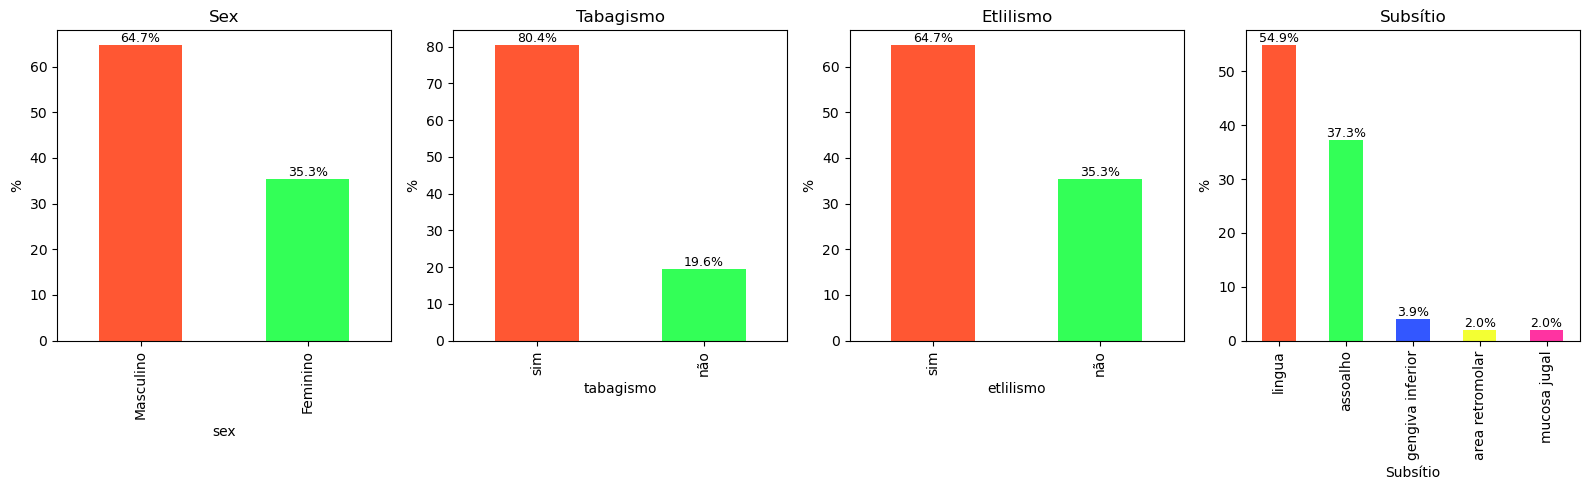

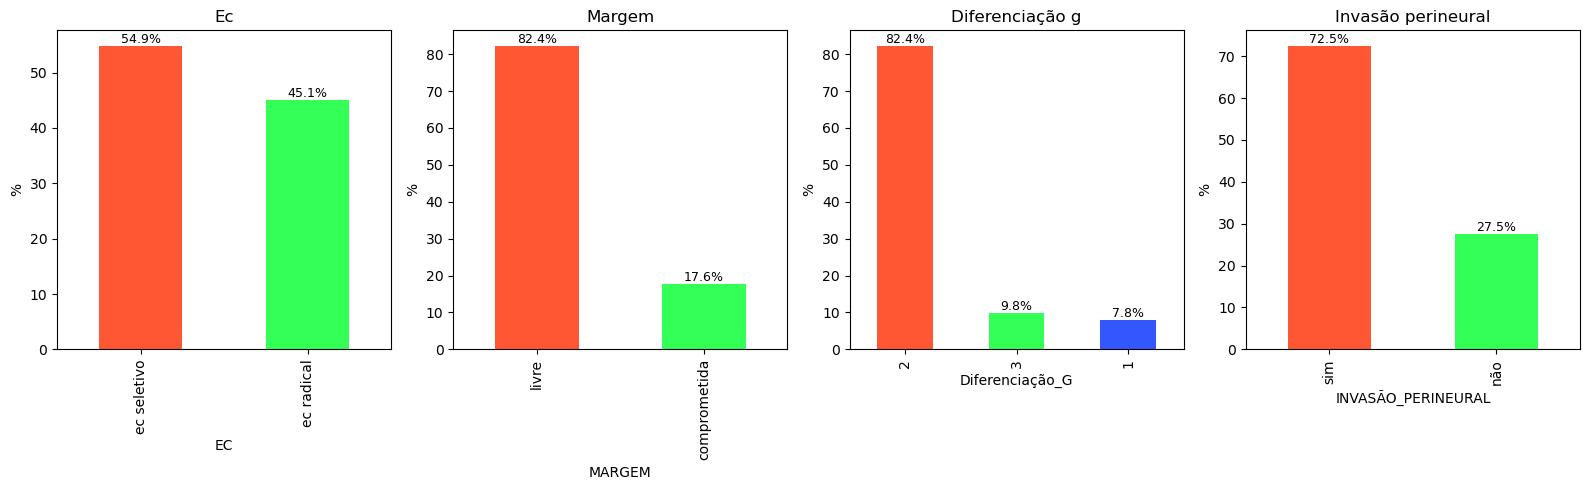

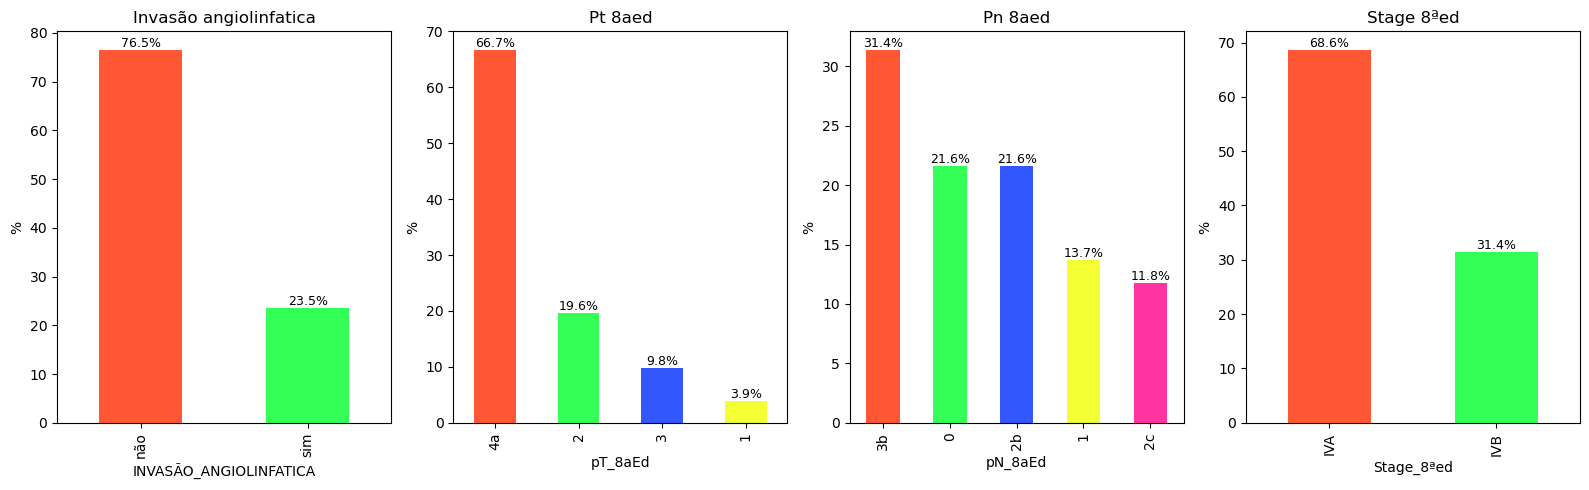

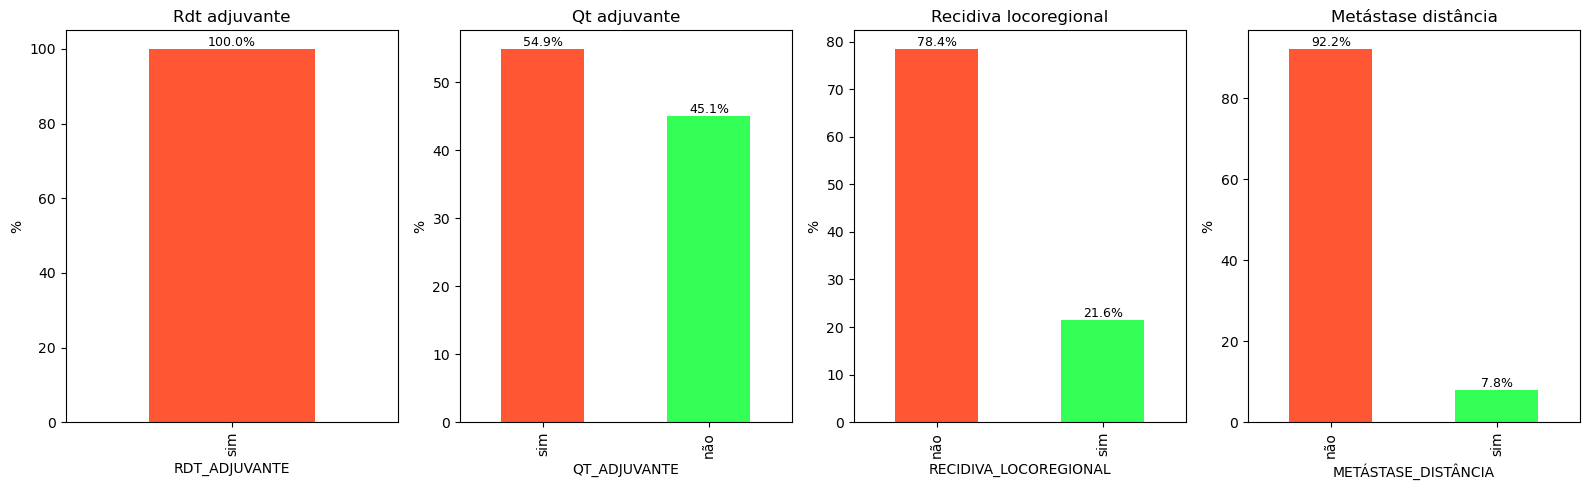

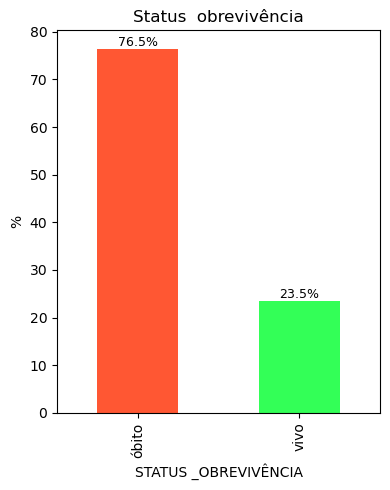

In [ ]:
# Lista das variáveis categóricas que você quer visualizar
cats = [  'sex', 'tabagismo', 'etlilismo', 'Subsítio', 'EC', 'MARGEM', 'Diferenciação_G', 'INVASÃO_PERINEURAL', 'INVASÃO_ANGIOLINFATICA',  'pT_8aEd', 'pN_8aEd', 'Stage_8ªed', 'RDT_ADJUVANTE',  'QT_ADJUVANTE', 'RECIDIVA_LOCOREGIONAL', 'METÁSTASE_DISTÂNCIA',  'STATUS _OBREVIVÊNCIA']

# Cores pré-definidas (amplie se tiver mais categorias diferentes)
colors = ['#FF5733', '#33FF57', '#3357FF', '#F3FF33', '#FF33A1', '#33FFF4', '#FF8C33']

index = 0
n_por_linha = 4

# Loop para exibir todos os gráficos
while index < len(cats):
    j = min(n_por_linha, len(cats) - index)
    fig, axes = plt.subplots(ncols=j, figsize=(4 * j, 5))

    if j == 1:
        axes = [axes]  # Garante que seja iterável

    for i in range(j):
        col = cats[index]

        # Verifica se a coluna existe
        if col not in df_raw.columns:
            print(f"⚠️ Coluna não encontrada: {col}")
            index += 1
            continue

        # Conta e calcula as porcentagens
        counts = df_raw[col].value_counts(dropna=False)
        percentages = counts / counts.sum() * 100

        # Gráfico
        bars = percentages.plot(kind="bar", ax=axes[i], color=colors[:len(percentages)])
        axes[i].set_title(col.replace('_', ' ').capitalize())
        axes[i].set_ylabel('%')

        # Adiciona rótulo com a porcentagem
        for bar in bars.patches:
            axes[i].annotate(f'{bar.get_height():.1f}%',
                             (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                             ha='center', va='bottom', fontsize=9)

        index += 1

    plt.tight_layout()
    plt.show()

In [ ]:
def boxplots_variaveis_numericas(df):
    colunas_numericas = df.select_dtypes(include='number').columns

    for col in colunas_numericas:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot - {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


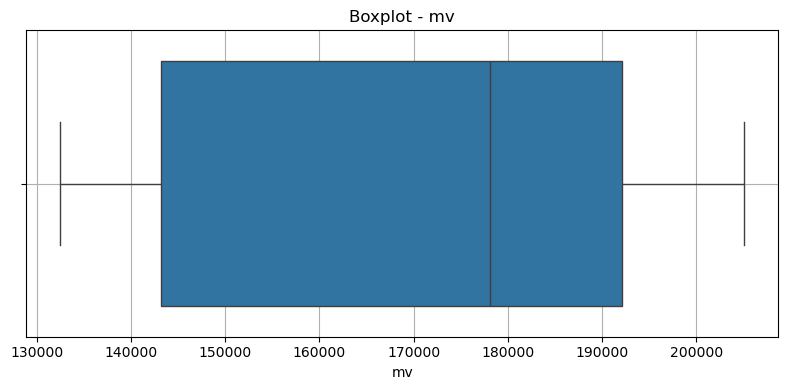

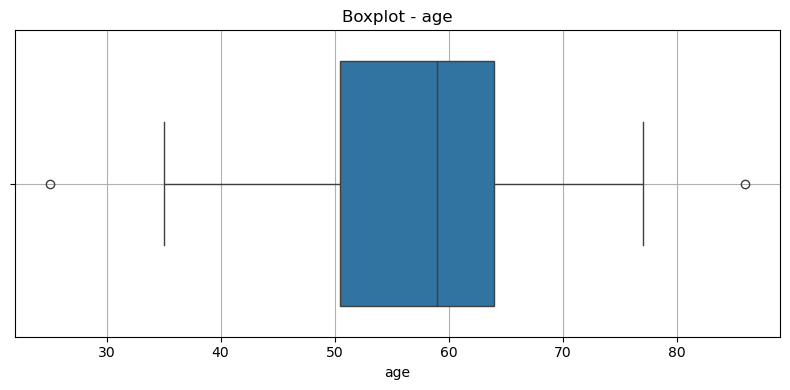

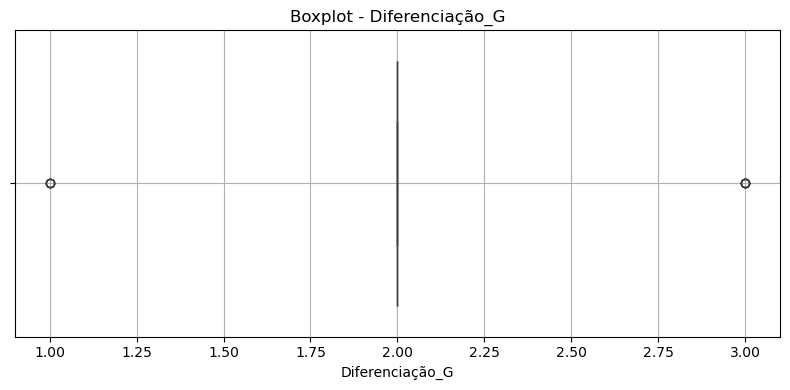

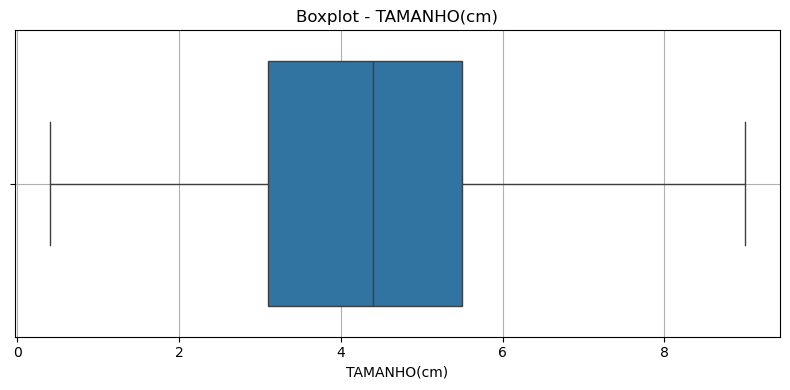

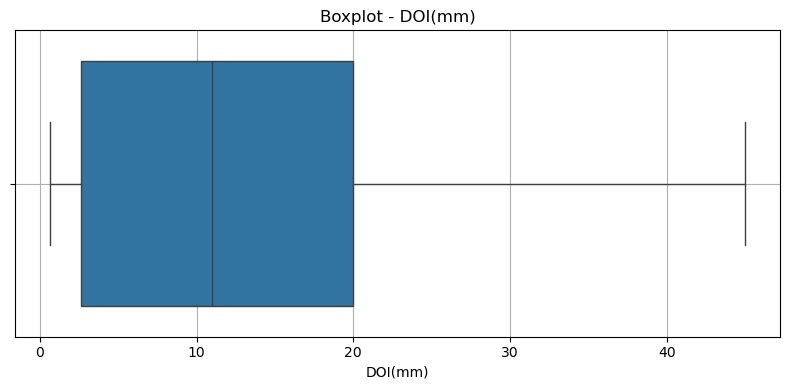

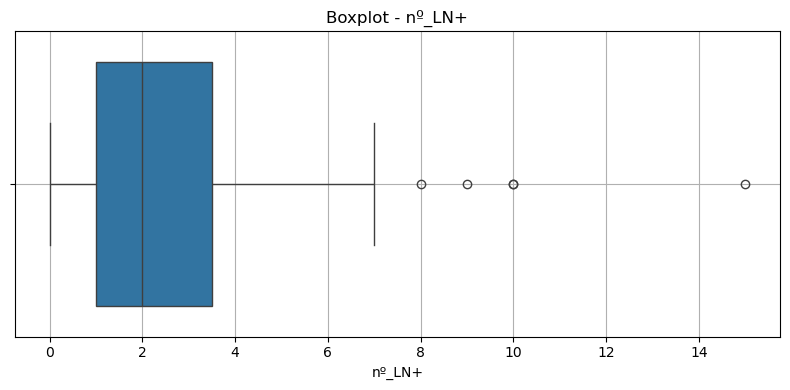

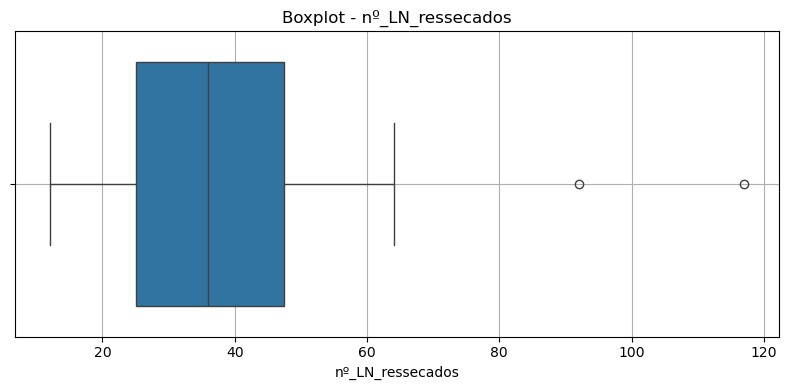

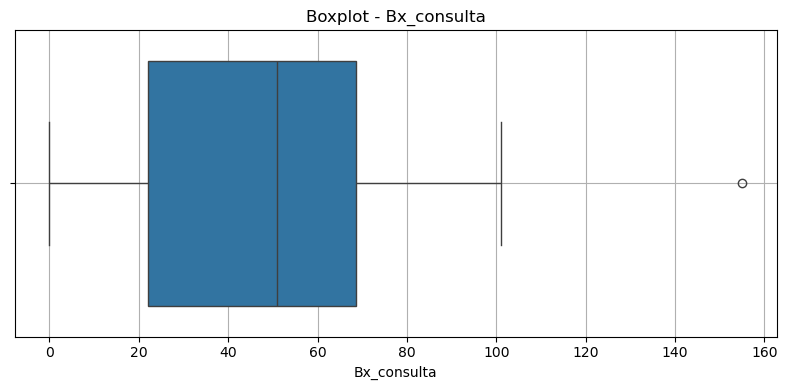

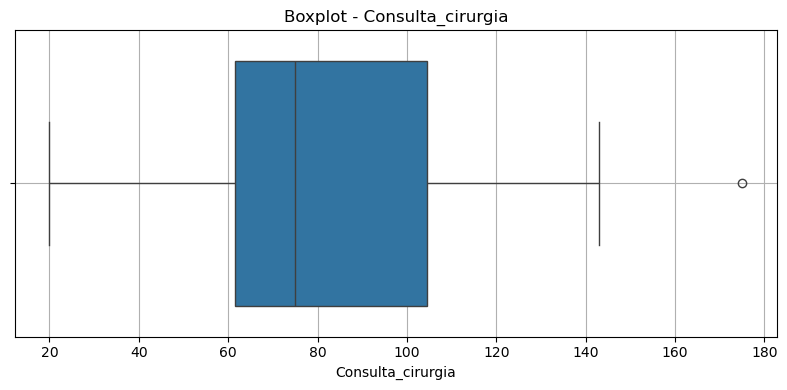

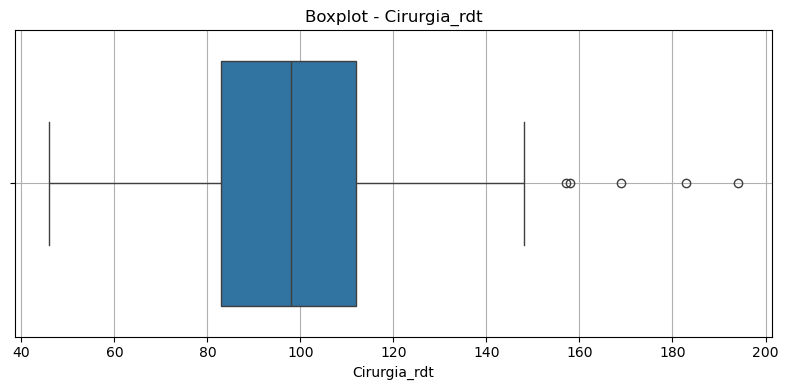

In [ ]:
boxplots_variaveis_numericas(df_raw)


In [ ]:
# avaliação do tempo de espera

In [ ]:
df_tempo = df_raw.copy()

In [ ]:
print(df_tempo.columns.tolist())

['mv', 'age', 'sex', 'IMC', 'tabagismo', 'etlilismo', 'pack.year', 'Data_bx', 'Data_1ªconsulta_ccp', 'Data_cirurgia', 'Subsítio', 'EC', 'MARGEM', 'Diferenciação_G', 'INVASÃO_PERINEURAL', 'INVASÃO_ANGIOLINFATICA', 'TAMANHO(cm)', 'DOI(mm)', 'nº_LN+', 'nº_LN_ressecados', 'Ln _extravasamento_capsular', 'pT_8aEd', 'pN_8aEd', 'Stage_8ªed', 'RDT_ADJUVANTE', 'DATA_início_RDT', 'QT_ADJUVANTE', 'RECIDIVA_LOCOREGIONAL', 'DATA_RECIDIVA_LOCORREGIONAL', 'METÁSTASE_DISTÂNCIA', 'DATA_METÁSTASE', 'ÚLTIMO_CONTATO', 'STATUS _OBREVIVÊNCIA', 'Bx_consulta', 'Consulta_cirurgia', 'Cirurgia_rdt', 'age_bins', 'age_bins2']


In [ ]:
df_tempo['Bx_consulta'].describe()

count     51.000000
mean      48.490196
std       31.575543
min        0.000000
25%       22.000000
50%       51.000000
75%       68.500000
max      155.000000
Name: Bx_consulta, dtype: float64

In [ ]:
df_tempo['Consulta_cirurgia'].describe()

count     51.000000
mean      81.941176
std       35.116043
min       20.000000
25%       61.500000
50%       75.000000
75%      104.500000
max      175.000000
Name: Consulta_cirurgia, dtype: float64

In [ ]:
df_tempo['Cirurgia_rdt'].describe()

count     51.000000
mean     102.274510
std       32.828085
min       46.000000
25%       83.000000
50%       98.000000
75%      112.000000
max      194.000000
Name: Cirurgia_rdt, dtype: float64

In [ ]:
def detectar_outliers_p95(df, colunas, id_col=None):
    """
    Retorna os outliers acima do percentil 95 para cada coluna numérica informada.

    Parâmetros:
        df (DataFrame): DataFrame de entrada
        colunas (list): lista de colunas a avaliar
        id_col (str): coluna identificadora (ex: 'mv')

    Retorna:
        dict: dicionário com DataFrames de outliers por coluna
    """
    outliers = {}
    for col in colunas:
        p95 = df[col].quantile(0.95)
        mask = df[col] > p95
        if id_col:
            outliers[col] = df.loc[mask, [id_col, col]]
        else:
            outliers[col] = df.loc[mask, [col]]
        print(f"{col}: {mask.sum()} outliers (P95 = {p95:.2f})")
    return outliers


# Uso:
colunas_interesse = ['Bx_consulta', 'Consulta_cirurgia', 'Cirurgia_rdt']
outliers_dict = detectar_outliers_p95(df_tempo, colunas_interesse, id_col="mv")



Bx_consulta: 3 outliers (P95 = 95.00)
Consulta_cirurgia: 2 outliers (P95 = 142.00)
Cirurgia_rdt: 3 outliers (P95 = 163.50)


C:\Users\franc\AppData\Local\Temp\ipykernel_16000\866579798.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


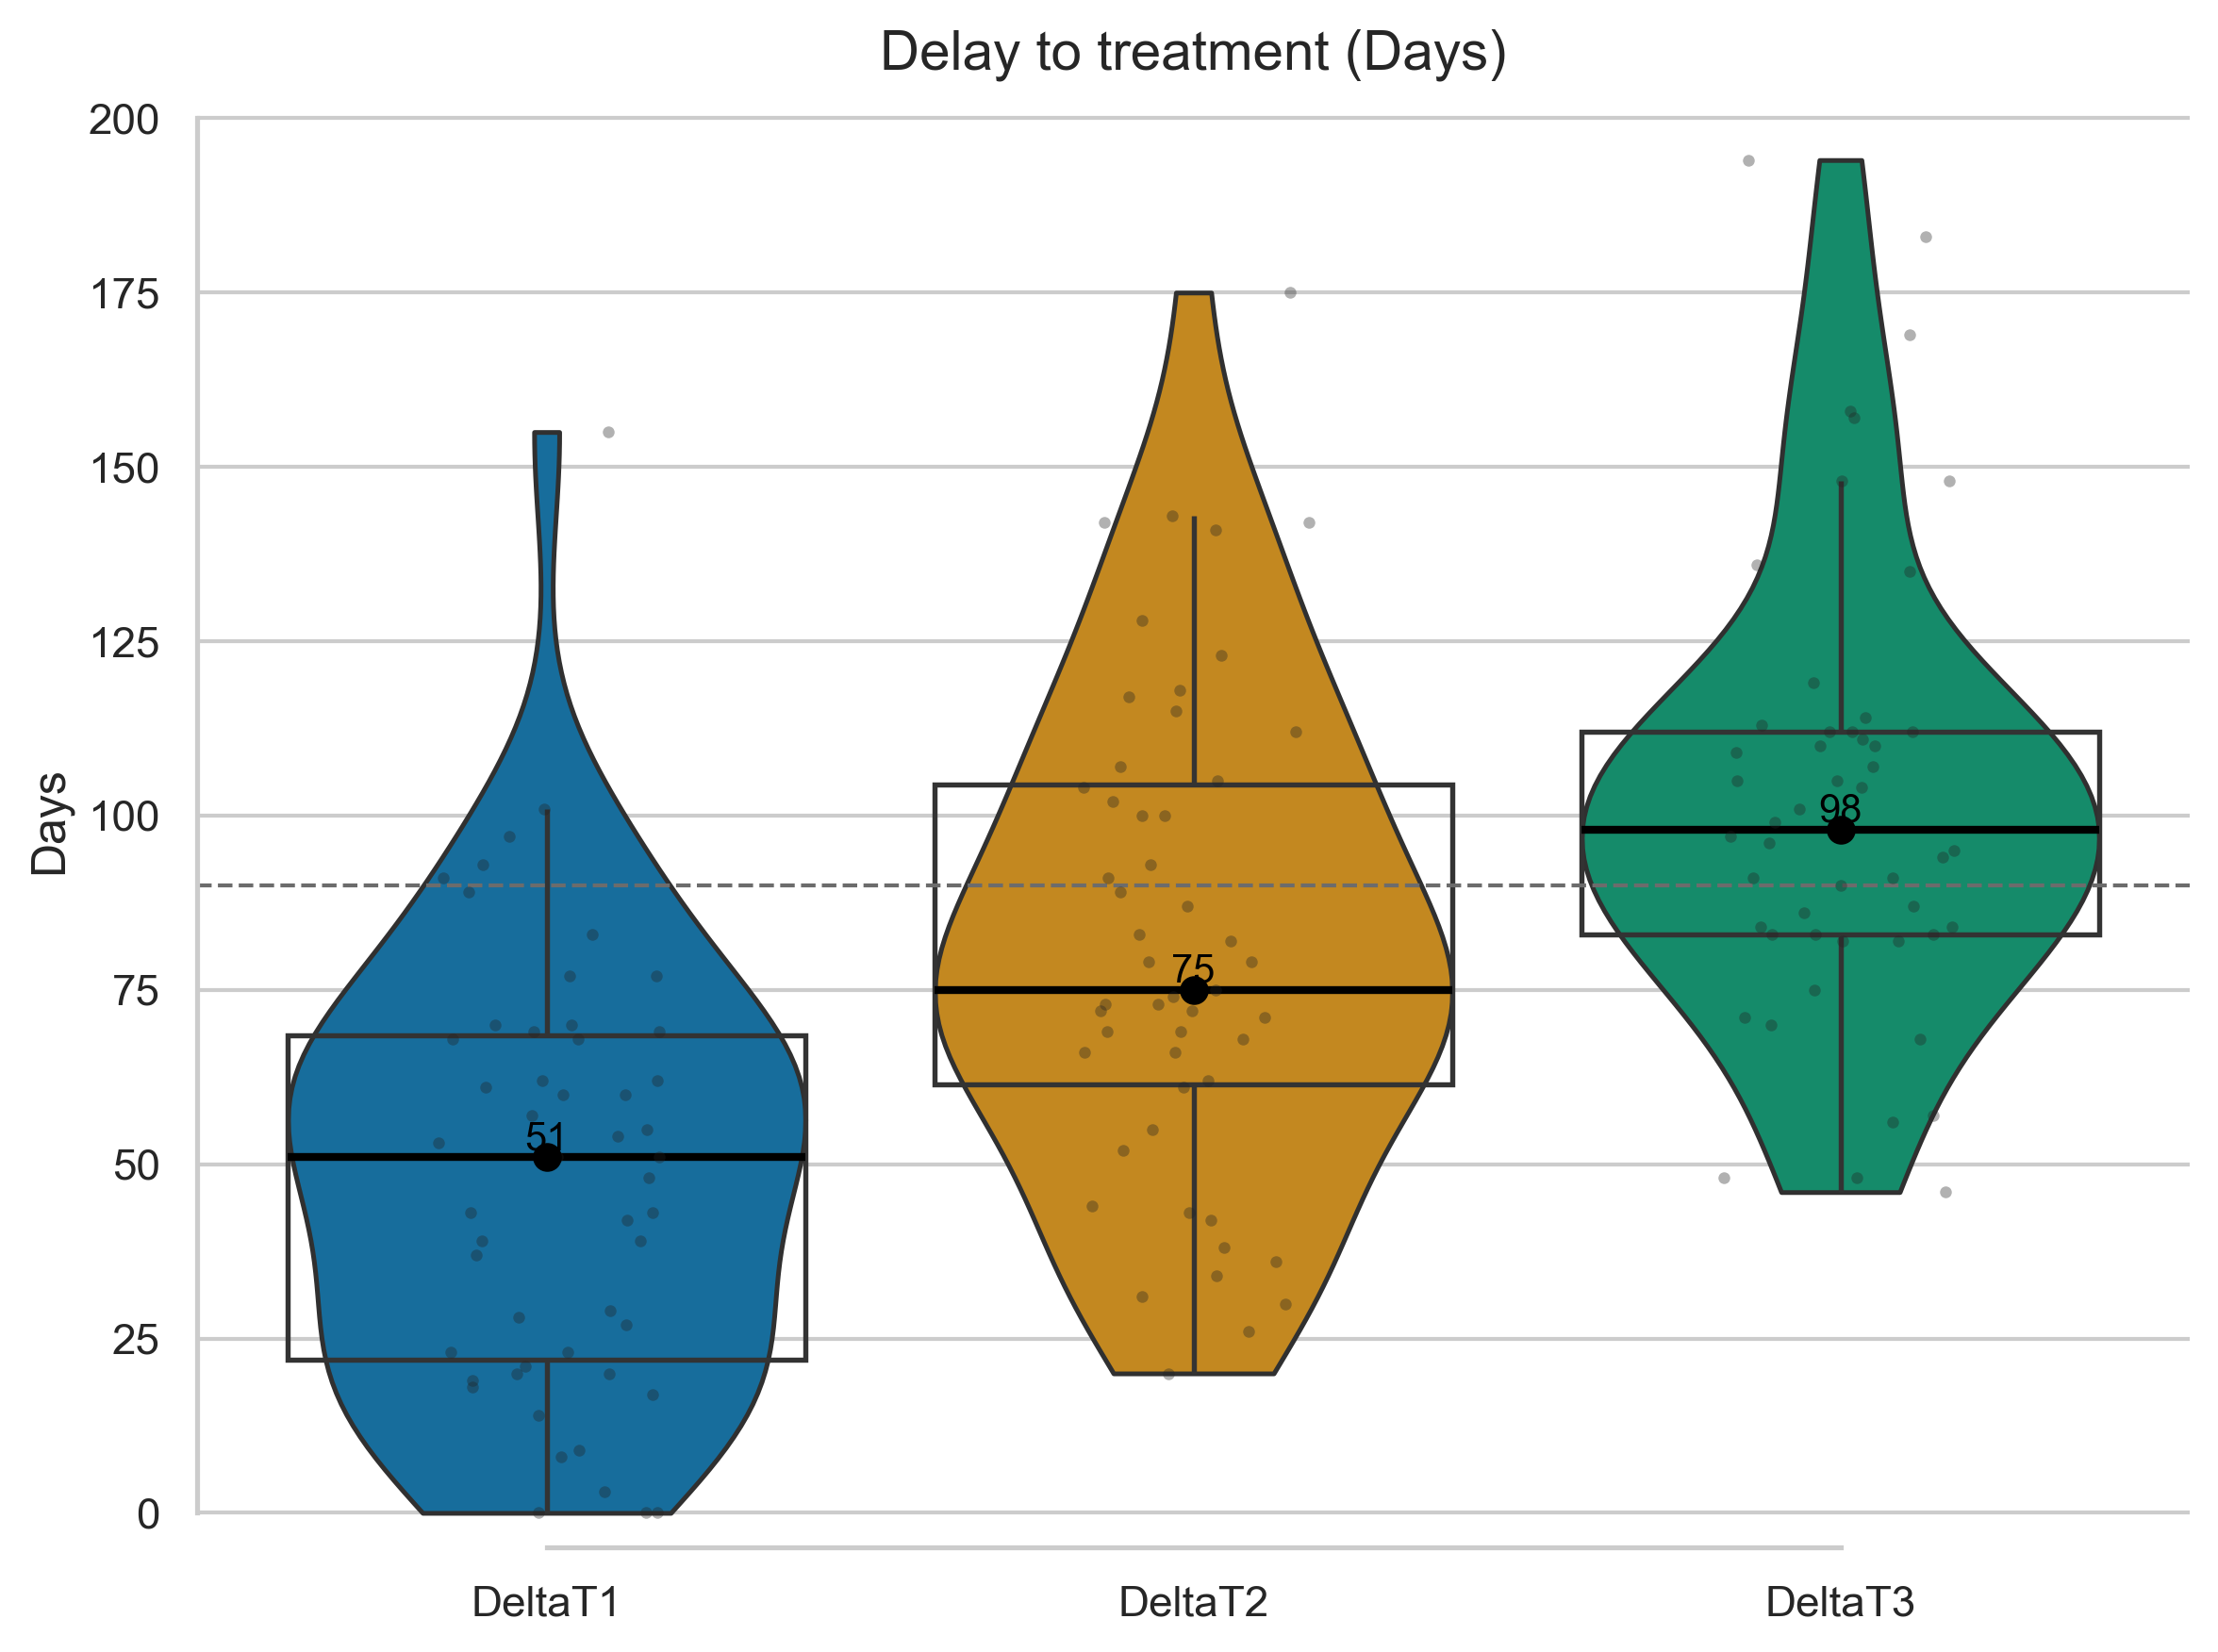

In [ ]:

# --- Dados (já renomeados como você fez) ---
dados = df_tempo[['Bx_consulta', 'Consulta_cirurgia', 'Cirurgia_rdt']].rename(columns={
    'Bx_consulta': 'DeltaT1',
    'Consulta_cirurgia': 'DeltaT2',
    'Cirurgia_rdt': 'DeltaT3'
})
dados_long = dados.melt(var_name="Intervalo", value_name="Dias")

# Ordem explícita dos eixos
order = ["DeltaT1", "DeltaT2", "DeltaT3"]

# --- Estilo para publicação / acessibilidade ---
sns.set_theme(style="whitegrid", rc={
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

# Paleta colorblind (mas sem depender de cor: reforçamos contornos/medianas/pontos)
palette = sns.color_palette("colorblind", len(order))

fig, ax = plt.subplots(figsize=(8, 6))

# Violin (sem box interna; vamos controlar o box por fora p/ melhor contraste)
sns.violinplot(
    x="Intervalo", y="Dias", data=dados_long,
    order=order, palette=palette, cut=0, inner=None,
    linewidth=1.2, ax=ax
)

# Boxplot "transparente" por cima (realça Q1‑Q3 e mediana com alto contraste)
sns.boxplot(
    x="Intervalo", y="Dias", data=dados_long, order=order,
    showcaps=False, showfliers=False,
    boxprops={"facecolor": "none", "edgecolor": "#333", "linewidth": 1.3},
    whiskerprops={"color": "#333", "linewidth": 1.3},
    medianprops={"color": "#000", "linewidth": 2},
    ax=ax
)

# Pontos individuais (não dependem de cor; alta transparência)
sns.stripplot(
    x="Intervalo", y="Dias", data=dados_long, order=order,
    color="#222", alpha=0.35, jitter=0.18, size=3, ax=ax
)

# Linha de referência em 90 dias
ax.axhline(90, ls="--", lw=1, color="#6c6c6c")

# Medianas (ponto + rótulo)
medianas = dados_long.groupby("Intervalo")["Dias"].median().reindex(order)
ax.scatter(range(len(order)), medianas.values, s=40, color="#000", zorder=5)
for i, y in enumerate(medianas.values):
    ax.text(i, y, f"{y:.0f}", va="bottom", ha="center", fontsize=10, color="#000")

# Eixo Y começando em 0 (ou incluindo negativos, se existirem)
ymin = min(0, np.nanmin(dados_long["Dias"].values) - 5)
ax.set_ylim(bottom=ymin)

# Rótulos e título
ax.set_title("Delay to treatment (Days)")  # sem rótulo no eixo X
ax.set_ylabel("Days")
ax.set_xlabel("")   # 🔹 remove o nome "Intervalo"

# Aparência limpa p/ publicação
sns.despine(trim=True)
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------

In [ ]:
# avaliar sobrevivencia

In [ ]:
df_sobrevivencia = df_tempo.copy()

In [ ]:
#definir óbito ou "não óbito" através do "status_obrevivencia"
df_sobrevivencia['STATUS _OBREVIVÊNCIA'] = df_sobrevivencia['STATUS _OBREVIVÊNCIA'].str.lower().str.contains('óbito').astype(int)

In [ ]:
df_sobrevivencia['STATUS _OBREVIVÊNCIA'].value_counts()

STATUS _OBREVIVÊNCIA
1    39
0    12
Name: count, dtype: int64

In [ ]:
pocentagem_sob = (df_sobrevivencia['STATUS _OBREVIVÊNCIA'].value_counts(normalize=True)*100).round(2)
print(pocentagem_sob)

STATUS _OBREVIVÊNCIA
1    76.47
0    23.53
Name: proportion, dtype: float64


In [ ]:
#1 = óbito
#0 = Vivo

In [ ]:
#calcular a sobrevivencia em dias usando data da cirurgia e ultimo contato.

df_sobrevivencia['Data_cirurgia'] = pd.to_datetime(df_sobrevivencia['Data_cirurgia'], errors='coerce')
df_sobrevivencia['ÚLTIMO_CONTATO'] = pd.to_datetime(df_sobrevivencia['ÚLTIMO_CONTATO'], errors='coerce')
df_sobrevivencia['sobrevida_dias'] = (df_sobrevivencia['ÚLTIMO_CONTATO'] - df_sobrevivencia['Data_cirurgia']).dt.days

In [ ]:
df_surv = df_sobrevivencia[['sobrevida_dias', 'STATUS _OBREVIVÊNCIA']].dropna()

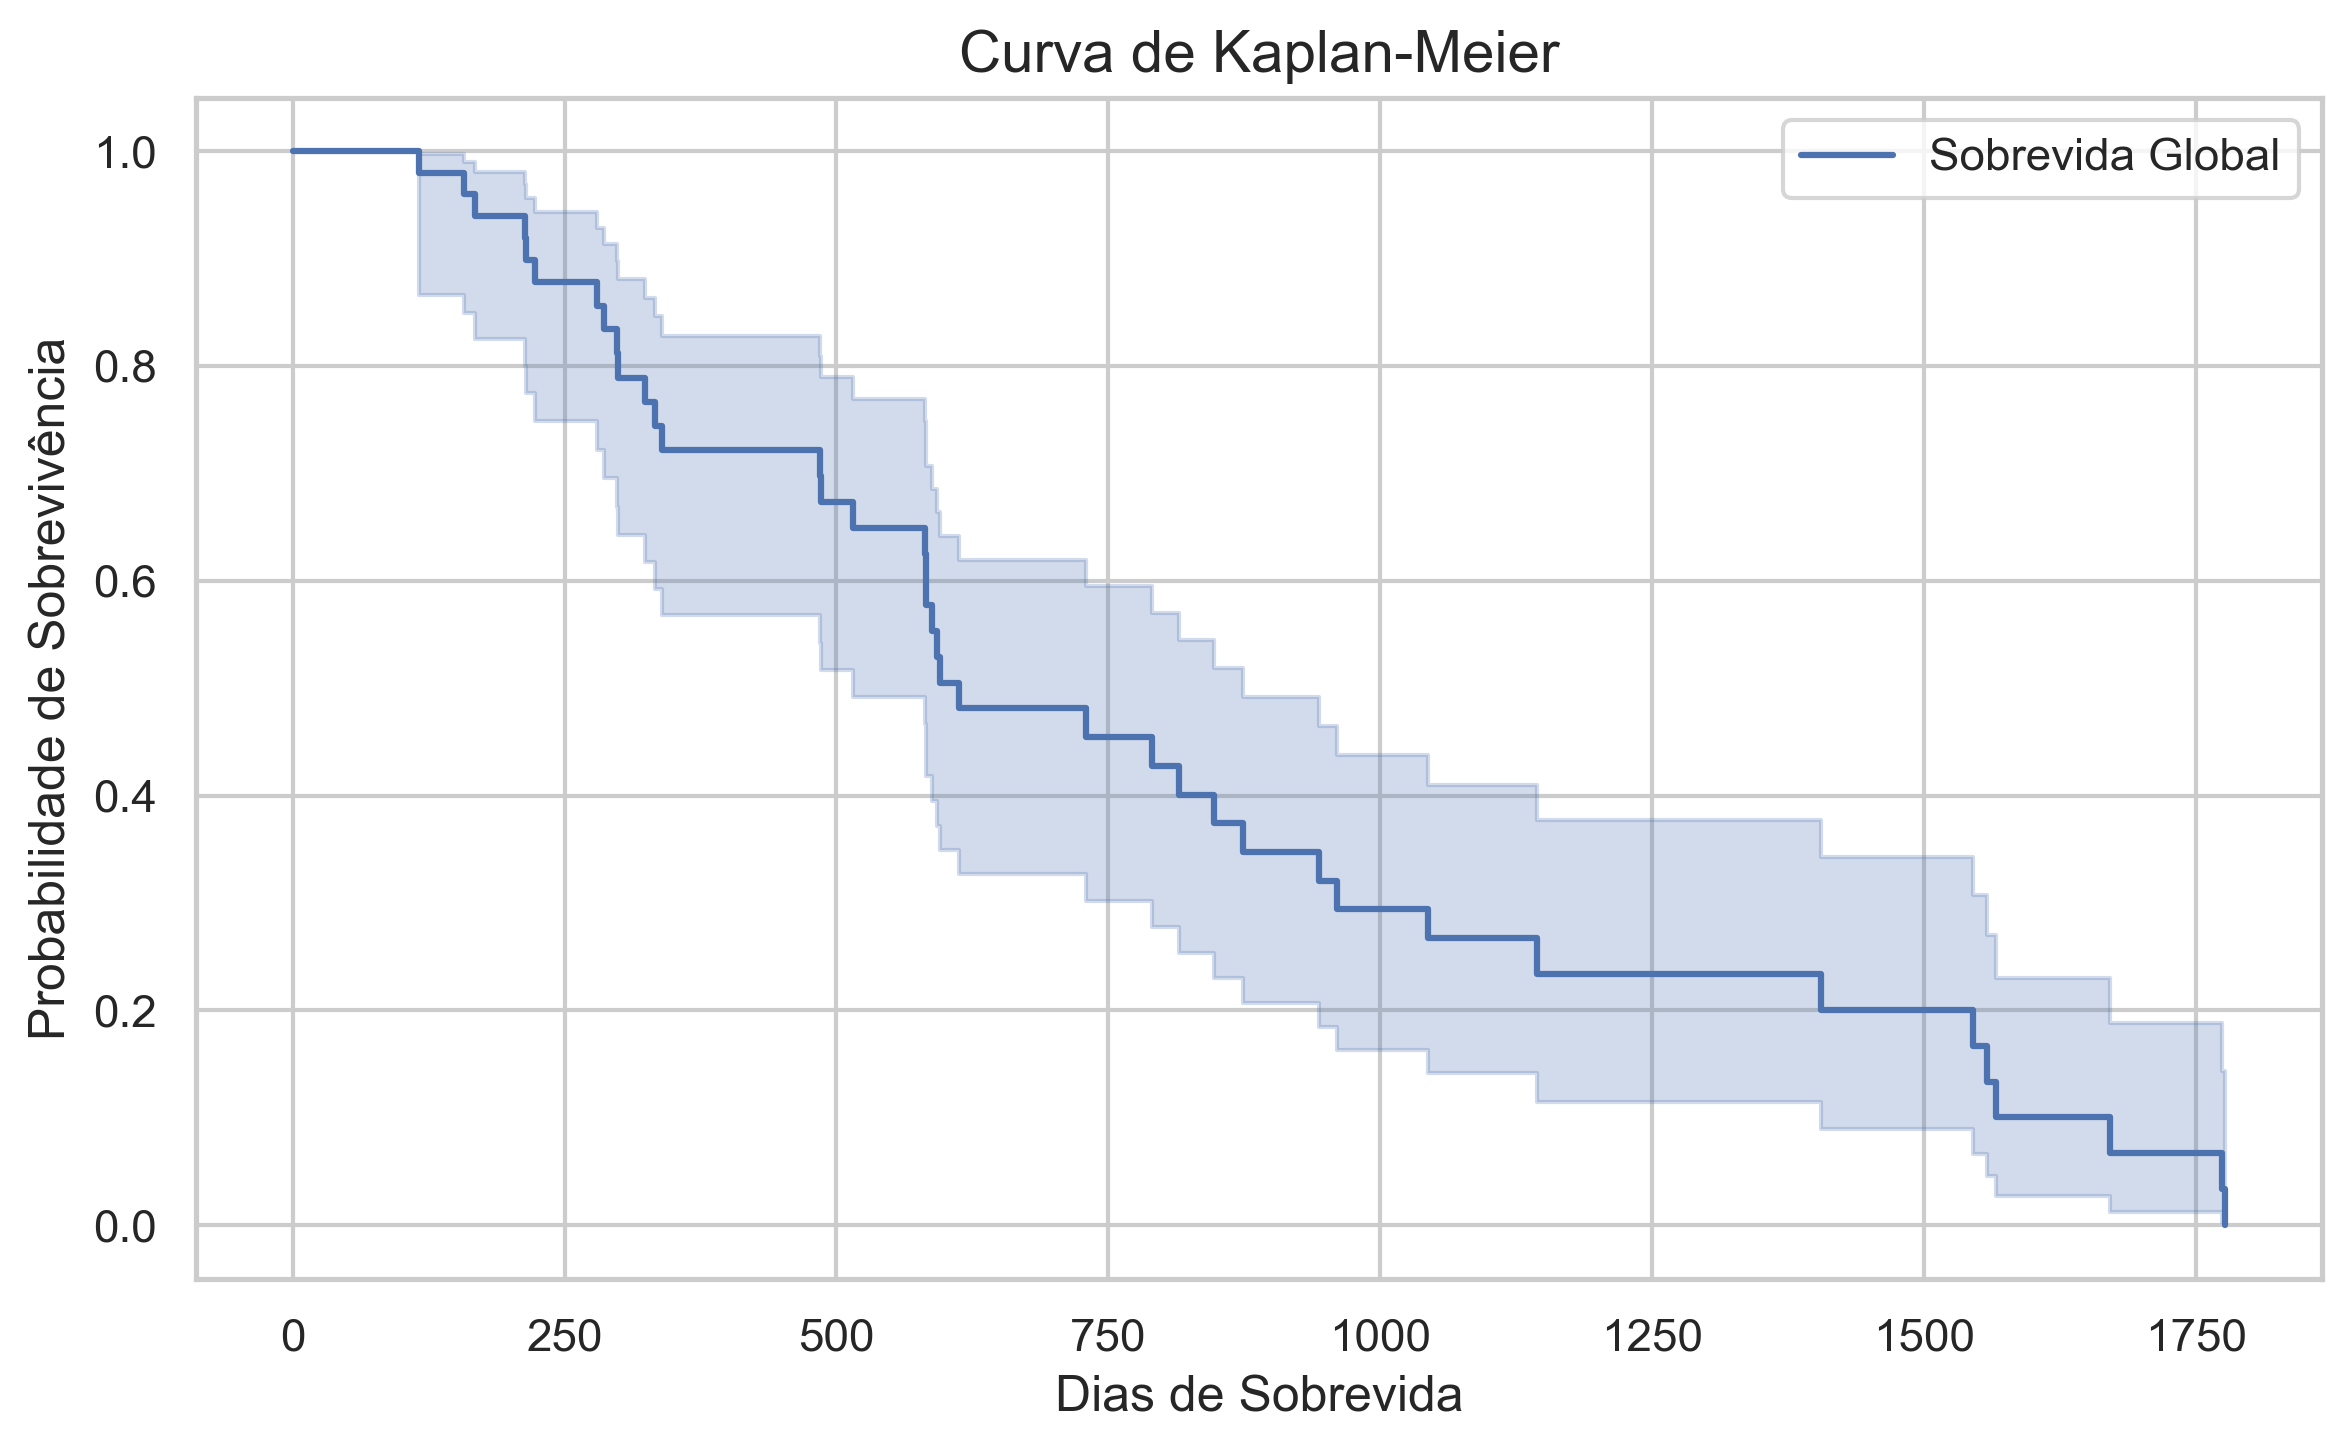

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df_surv['sobrevida_dias'], event_observed=df_surv['STATUS _OBREVIVÊNCIA'])
# Ajusta o modelo aos dados
kmf.fit(
    durations=df_surv['sobrevida_dias'],
    event_observed=df_surv['STATUS _OBREVIVÊNCIA'],
    label='Sobrevida Global'
)

# Plota a curva de Kaplan-Meier
plt.figure(figsize=(8, 5))
kmf.plot_survival_function(ci_show=True)
plt.title('Curva de Kaplan-Meier')
plt.xlabel('Dias de Sobrevida')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.tight_layout()
plt.show()

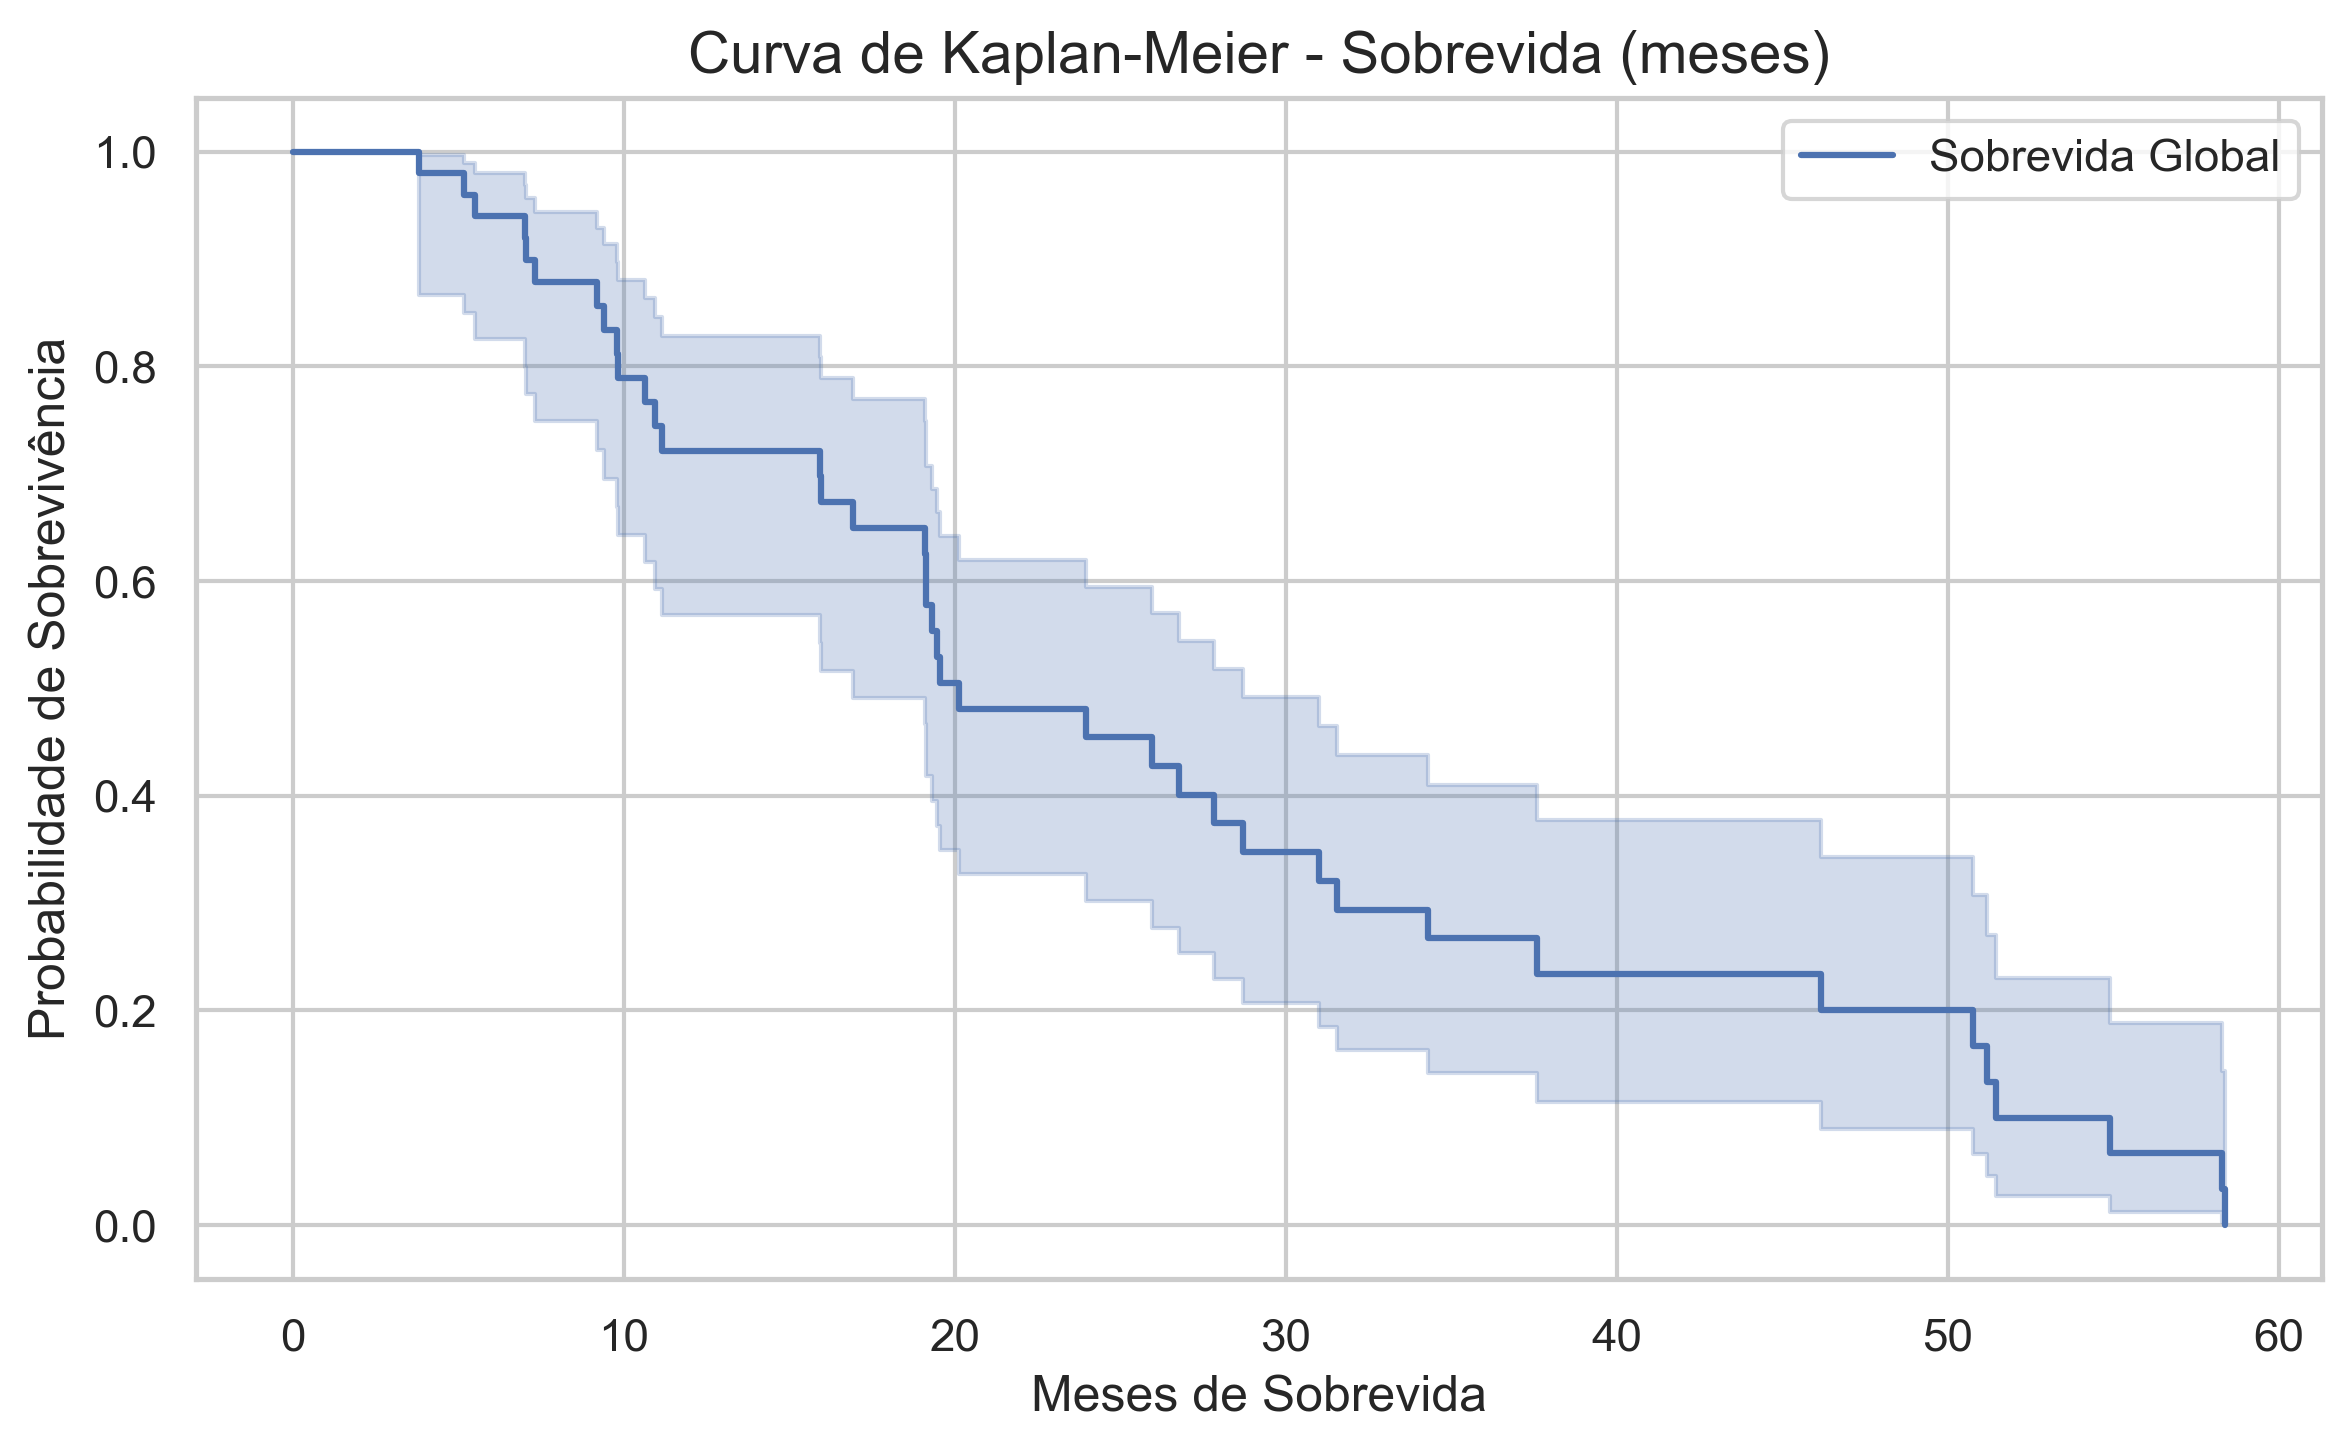

In [ ]:
# Criar nova coluna com tempo em meses
df_surv['sobrevida_meses'] = df_surv['sobrevida_dias'] / 30.44

# Inicializar o modelo
kmf = KaplanMeierFitter()

# Ajustar o modelo
kmf.fit(
    durations=df_surv['sobrevida_meses'],
    event_observed=df_surv['STATUS _OBREVIVÊNCIA'],
    label='Sobrevida Global'
)

# Plotar
plt.figure(figsize=(8, 5))
kmf.plot_survival_function(ci_show=True)
plt.title('Curva de Kaplan-Meier - Sobrevida (meses)')
plt.xlabel('Meses de Sobrevida')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.tight_layout()
plt.show()


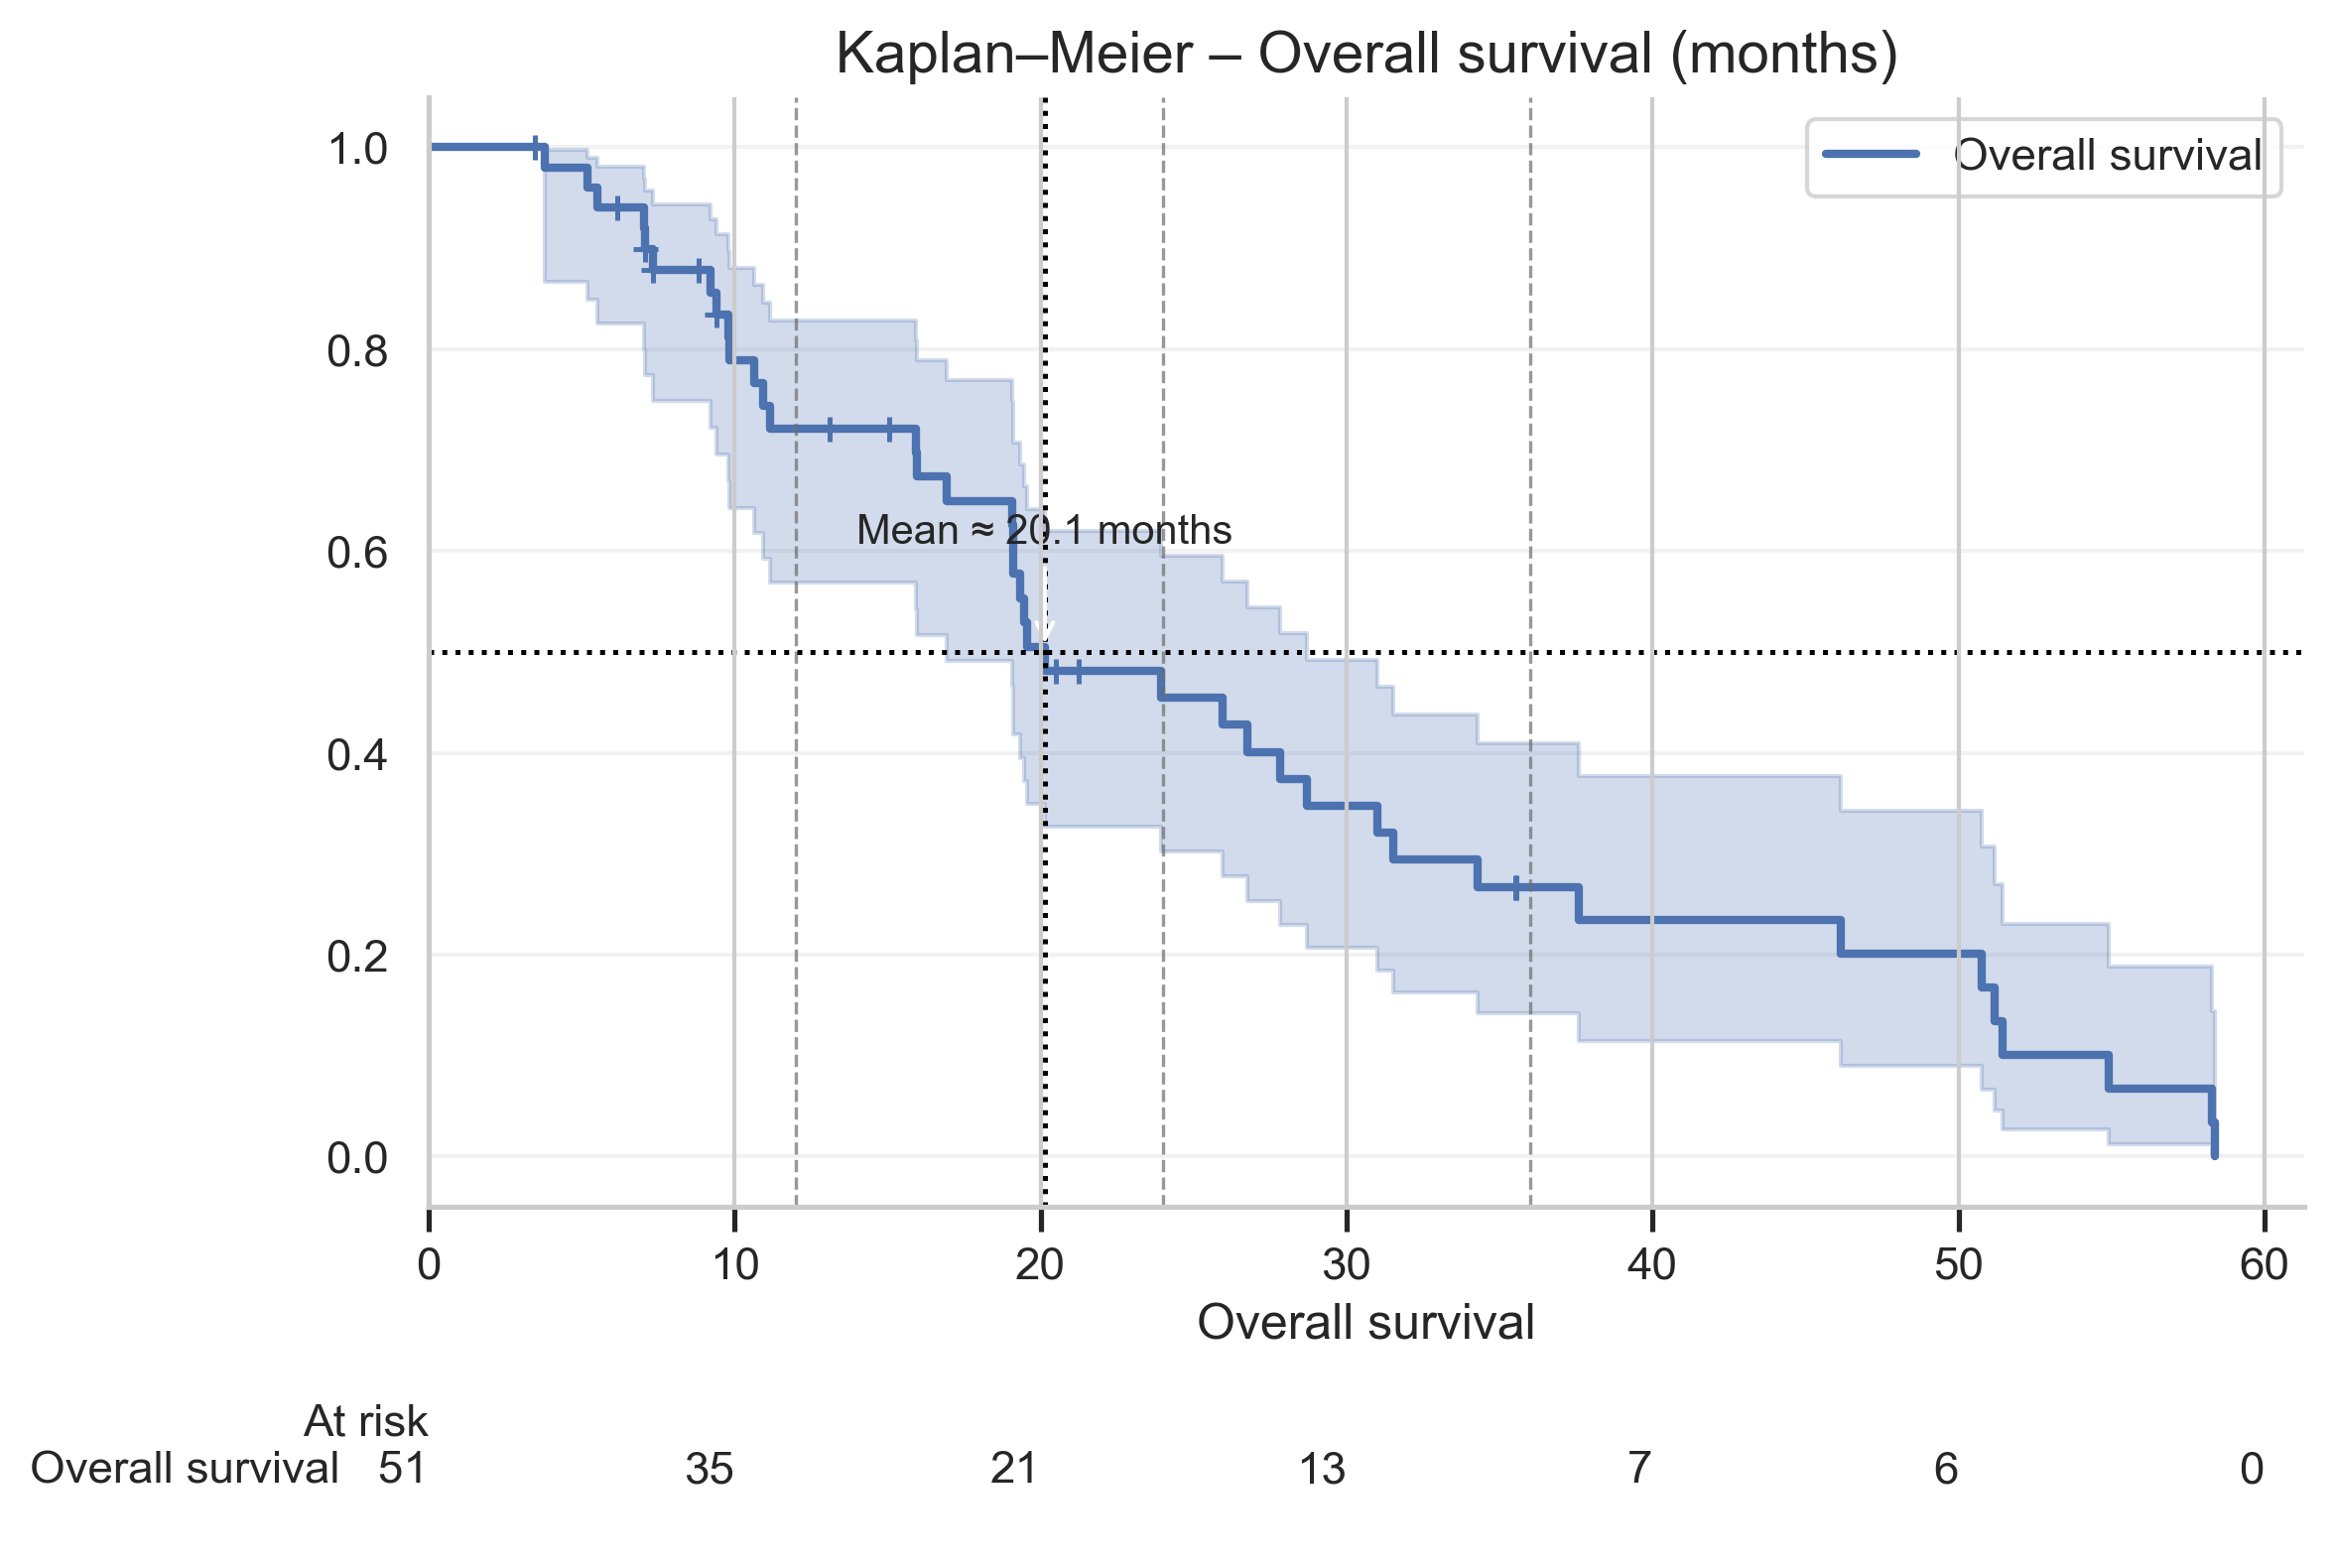

In [ ]:
# --- Pré-requisitos ---
# pip install lifelines matplotlib


# ---------- 1) Higienizar e preparar ----------
df = df_surv.copy()

# Às vezes a coluna vem com espaços; isso remove espaços à esquerda/direita
df.columns = df.columns.str.strip()

# Criar tempo em meses (30.44 ~ mês médio)
if "sobrevida_meses" not in df.columns:
    df["sobrevida_meses"] = df["sobrevida_dias"] / 30.44

# Garantir tipos corretos e remover valores inválidos
durations = pd.to_numeric(df["sobrevida_meses"], errors="coerce")
events = pd.to_numeric(df["STATUS _OBREVIVÊNCIA"], errors="coerce")  # 1=óbito, 0=censura

mask_valid = durations.notna() & events.notna() & (durations >= 0)
durations = durations[mask_valid]
events = events[mask_valid].astype(int)

# ---------- 2) Ajustar o KM ----------
kmf = KaplanMeierFitter(label="Overall survival")
kmf.fit(durations=durations, event_observed=events)

# ---------- 3) Estética “paper-ready” / acessível ----------
plt.rcParams.update({
    "figure.dpi": 300, "savefig.dpi": 300,
    "axes.labelsize": 12, "axes.titlesize": 14,
    "xtick.labelsize": 11, "ytick.labelsize": 11
})

fig, ax = plt.subplots(figsize=(8, 5.5))

# Curva de sobrevivência com IC; marcando censuras por forma (não por cor)
kmf.plot_survival_function(
    ax=ax, ci_show=True, show_censors=True,
    censor_styles={"ms": 6, "marker": "+", "mew": 1.2},
    linewidth=2
)

# Grade leve para leitura
ax.grid(True, alpha=0.25)
ax.set_title("Kaplan–Meier – Overall survival (months)")
ax.set_xlabel("Overall survival")
ax.set_ylabel("")

# Marcas de referência em 12, 24 e 36 meses (ajuste conforme seu follow-up)
for xm in [12, 24, 36]:
    ax.axvline(xm, ls="--", lw=0.8, color="#6c6c6c", alpha=0.7)

# Mediana de sobrevida (se existir) com linhas guia e anotação
med = kmf.median_survival_time_
if np.isfinite(med):
    # Linha horizontal em S(t)=0.5 e vertical na mediana
    ax.axhline(0.5, ls=":", lw=1.2, color="black")
    ax.axvline(med, ls=":", lw=1.2, color="black")
    ax.annotate(
        f"Mean ≈ {med:.1f} months",
        xy=(med, 0.5), xytext=(med, 0.6),
        arrowprops=dict(arrowstyle="->", lw=1),
        ha="center", va="bottom", fontsize=10
    )

# Limites elegantes
xmin, xmax = ax.get_xlim()
ax.set_xlim(left=0, right=xmax)

# ---------- 4) Tabela de número em risco ----------
# Cria automaticamente um eixo abaixo do gráfico principal
add_at_risk_counts(kmf, ax=ax, rows_to_show=["At risk"])

# Deixar os eixos “clean”
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# --- Dica de exportação para submissão ---
# fig.savefig("km_sobrevida_global.png", bbox_inches="tight")  # ou .pdf


----------------------------------------------------------------------------------------------

In [ ]:
#recorrencia

In [ ]:
df_livre_doenca = df_sobrevivencia.copy()

In [ ]:
df_livre_doenca.shape

(51, 39)

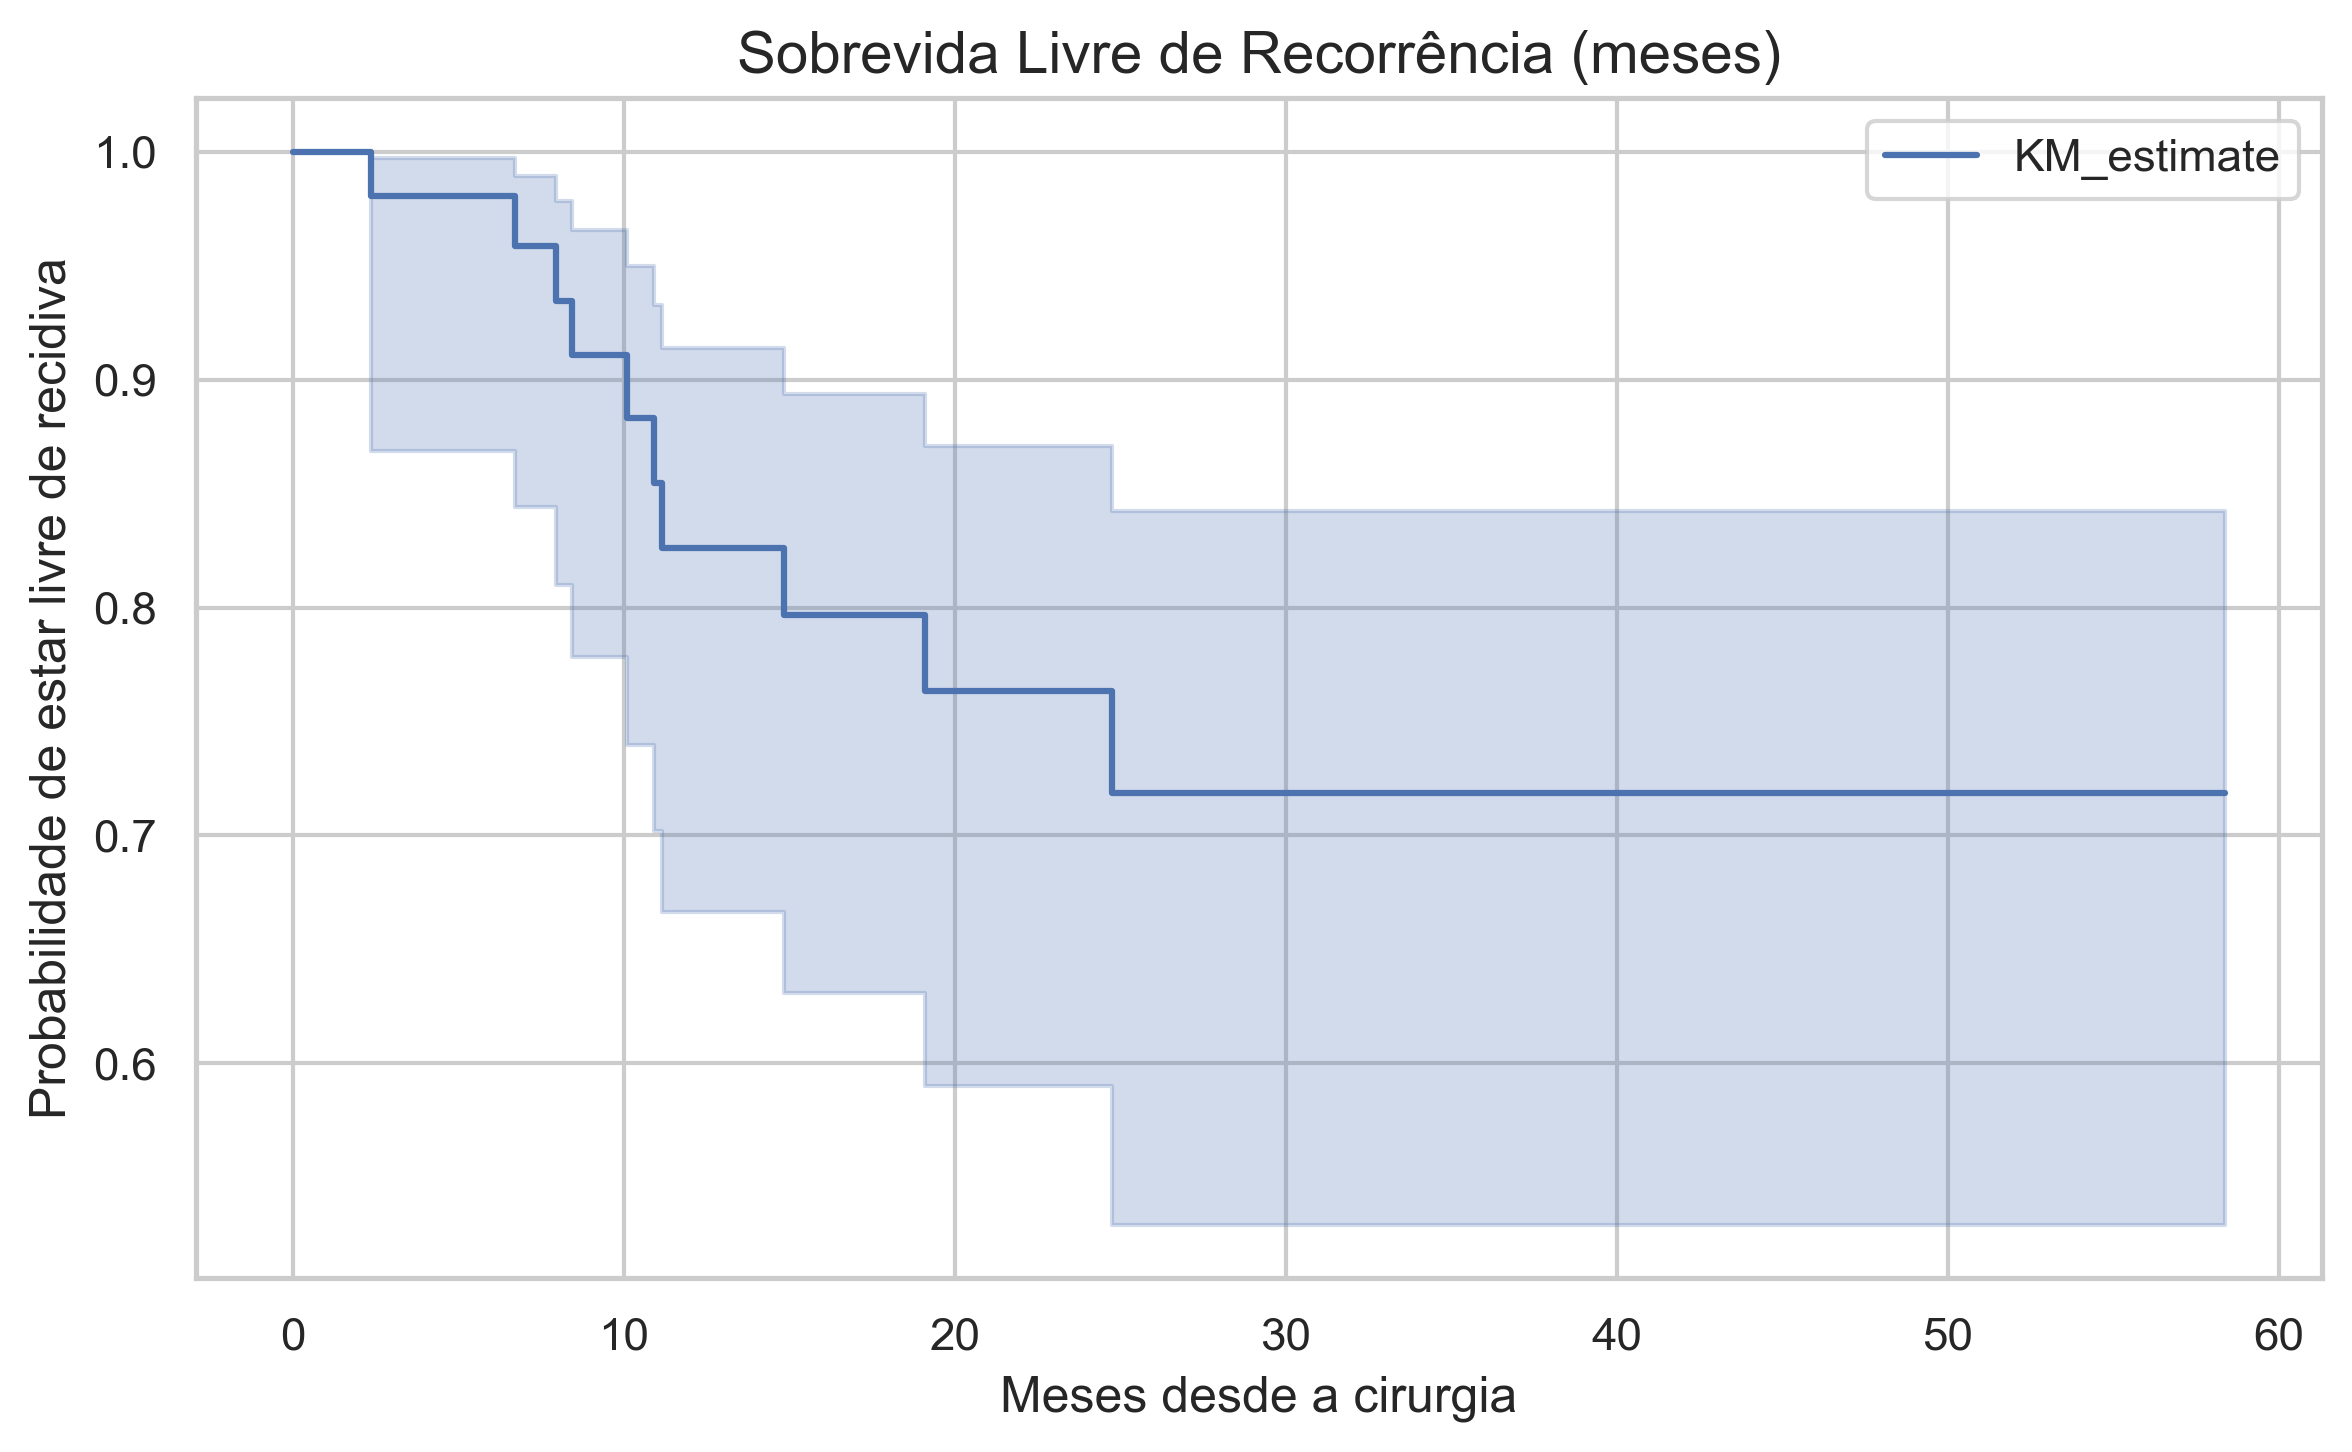

evento_slr
0    41
1    10
Name: count, dtype: int64


In [ ]:
# 1. Converter datas
df_livre_doenca['Data_cirurgia'] = pd.to_datetime(df_livre_doenca['Data_cirurgia'], errors='coerce')
df_livre_doenca['DATA_RECIDIVA_LOCORREGIONAL'] = pd.to_datetime(df_livre_doenca['DATA_RECIDIVA_LOCORREGIONAL'], errors='coerce')
df_livre_doenca['DATA_RECIDIVA_LOCORREGIONAL'] = pd.to_datetime(df_livre_doenca['DATA_RECIDIVA_LOCORREGIONAL'], errors='coerce')
df_livre_doenca['ÚLTIMO_CONTATO'] = pd.to_datetime(df_livre_doenca['ÚLTIMO_CONTATO'], errors='coerce')

# 2. Determinar a data do primeiro evento de recorrência
df_livre_doenca['data_recorrencia'] = df_livre_doenca[['DATA_RECIDIVA_LOCORREGIONAL', 'DATA_RECIDIVA_LOCORREGIONAL']].min(axis=1)

# 3. Calcular tempo até evento ou censura (em meses)
df_livre_doenca['tempo_slr_meses'] = (
    (df_livre_doenca['data_recorrencia'].fillna(df_livre_doenca['ÚLTIMO_CONTATO']) - df_livre_doenca['Data_cirurgia']).dt.days / 30.44
)

# 4. Variável de evento: 1 = teve recidiva ou metástase, 0 = censurado
df_livre_doenca['evento_slr'] = df_livre_doenca[['DATA_RECIDIVA_LOCORREGIONAL', 'DATA_RECIDIVA_LOCORREGIONAL']].notna().any(axis=1).astype(int)

# 5. Criar base final, removendo valores negativos ou faltantes
df_slr = df_livre_doenca[df_livre_doenca['tempo_slr_meses'] >= 0][['tempo_slr_meses', 'evento_slr']].dropna()

# 6. Ajustar modelo de Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=df_slr['tempo_slr_meses'], event_observed=df_slr['evento_slr'])

# 7. Plotar curva
plt.figure(figsize=(8, 5))
kmf.plot(ci_show=True)
plt.title("Sobrevida Livre de Recorrência (meses)")
plt.xlabel("Meses desde a cirurgia")
plt.ylabel("Probabilidade de estar livre de recidiva")
plt.grid(True)
plt.tight_layout()
plt.show()

# (opcional) número de eventos e censurados
print(df_slr['evento_slr'].value_counts())


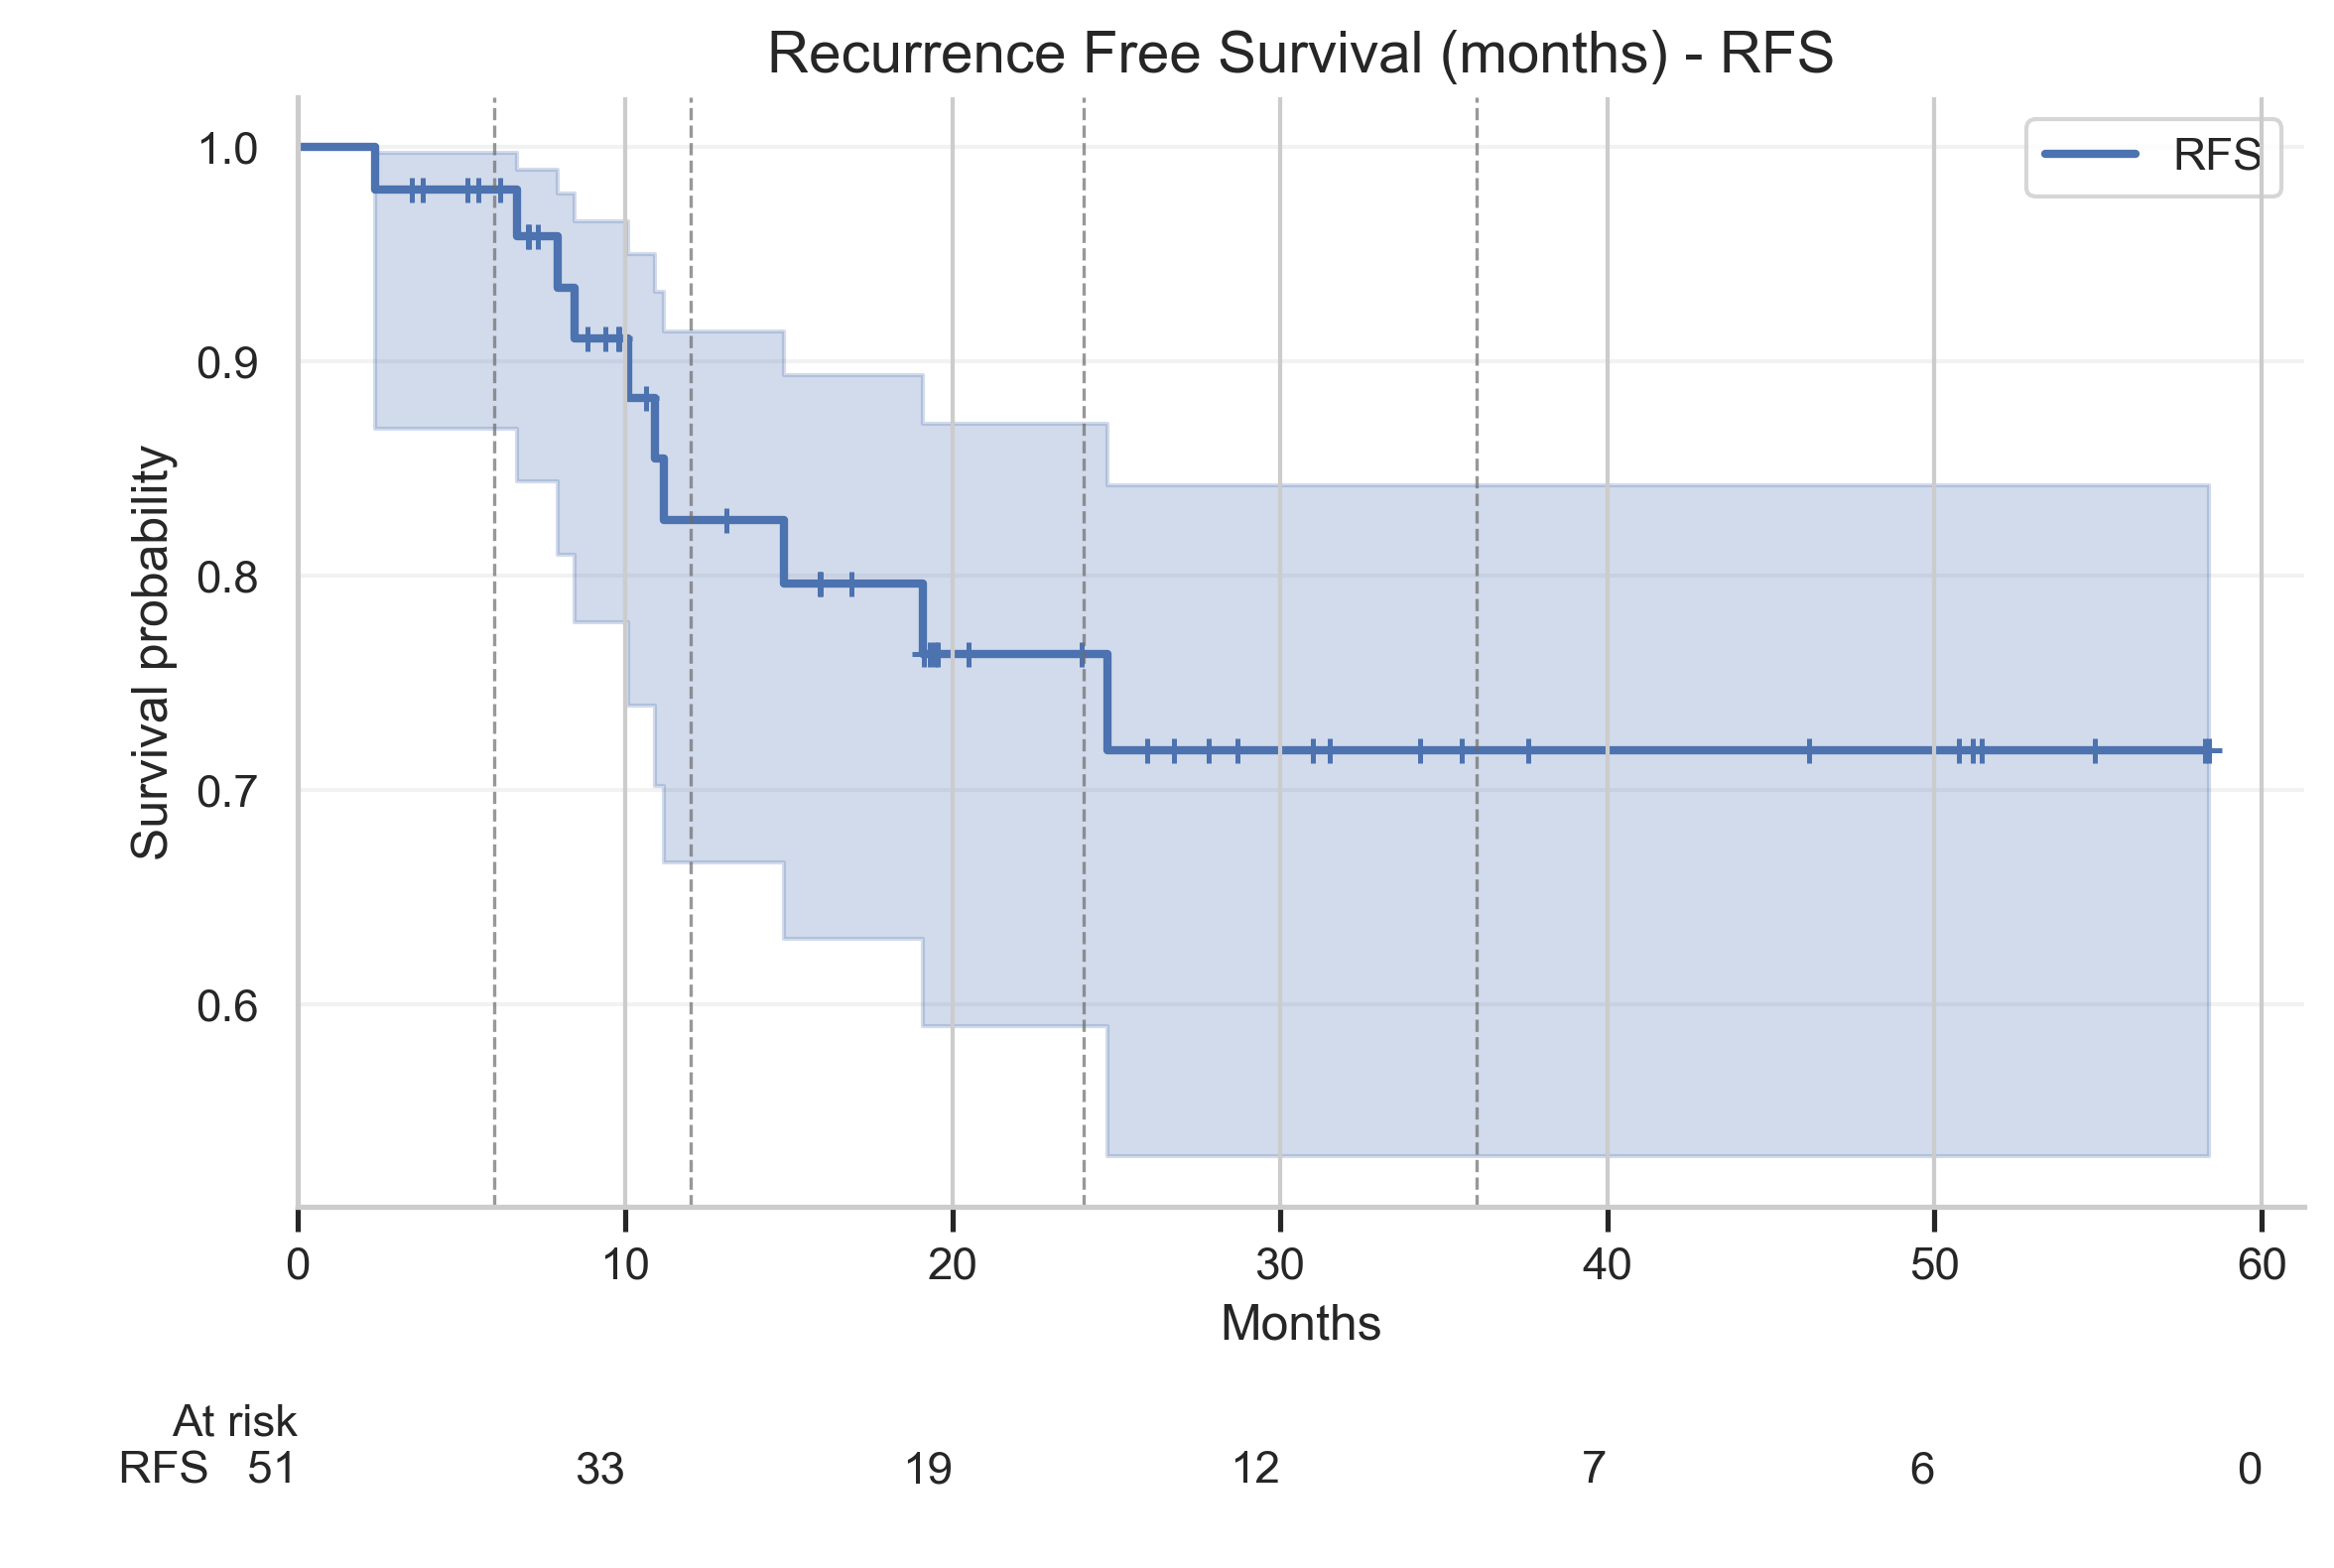

Events: 10 | Censored: 41


In [ ]:
# Requer: lifelines >= 0.27, matplotlib, numpy, pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

# ===================== #
# 0) Preparação robusta #
# ===================== #

# (usa seu bloco anterior para preparar df_slr)
# df_slr deve ter: 'tempo_slr_meses' (float) e 'evento_slr' (0=cens, 1=evento)

# Sanidade: remover tempos negativos/NaN (já feito no seu código)
df_slr = df_slr.copy()
durations = pd.to_numeric(df_slr["tempo_slr_meses"], errors="coerce")
events = pd.to_numeric(df_slr["evento_slr"], errors="coerce").astype("Int64")

mask_valid = durations.notna() & events.notna() & (durations >= 0)
durations = durations[mask_valid]
events = events[mask_valid].astype(int)

# ================== #
# 1) Ajuste do modelo #
# ================== #
kmf = KaplanMeierFitter(label="RFS")
kmf.fit(durations=durations, event_observed=events)

# ======================= #
# 2) Estética para artigo #
# ======================= #
plt.rcParams.update({
    "figure.dpi": 300, "savefig.dpi": 300,
    "axes.labelsize": 12, "axes.titlesize": 14,
    "xtick.labelsize": 11, "ytick.labelsize": 11
})

fig, ax = plt.subplots(figsize=(8, 5.5))

# Curva com IC e censuras por símbolo (acessível a daltônicos)
kmf.plot_survival_function(
    ax=ax, ci_show=True, show_censors=True,
    censor_styles={"ms": 6, "marker": "+", "mew": 1.2},
    linewidth=2
)

# Título e eixos
ax.set_title("Recurrence Free Survival (months) - RFS")
ax.set_xlabel("Months")
ax.set_ylabel("Survival probability")

# Grade leve e linhas‑guia verticais (ajuste marcos conforme seu follow‑up)
ax.grid(True, alpha=0.25)
for xm in [6, 12, 24, 36]:
    ax.axvline(xm, ls="--", lw=0.8, color="#6c6c6c", alpha=0.7)


# Limites elegantes do eixo X
xmax = ax.get_xlim()[1]
ax.set_xlim(left=0, right=xmax)

# ============================ #
# 3) Tabela de número em risco #
# ============================ #
add_at_risk_counts(kmf, ax=ax, rows_to_show=["At risk"])

# Aparência limpa
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# (Opcional) imprimir contagem de eventos vs censuras
n_events = int(events.sum())
n_censored = int((1 - events).sum())
print(f"Events: {n_events} | Censored: {n_censored}")



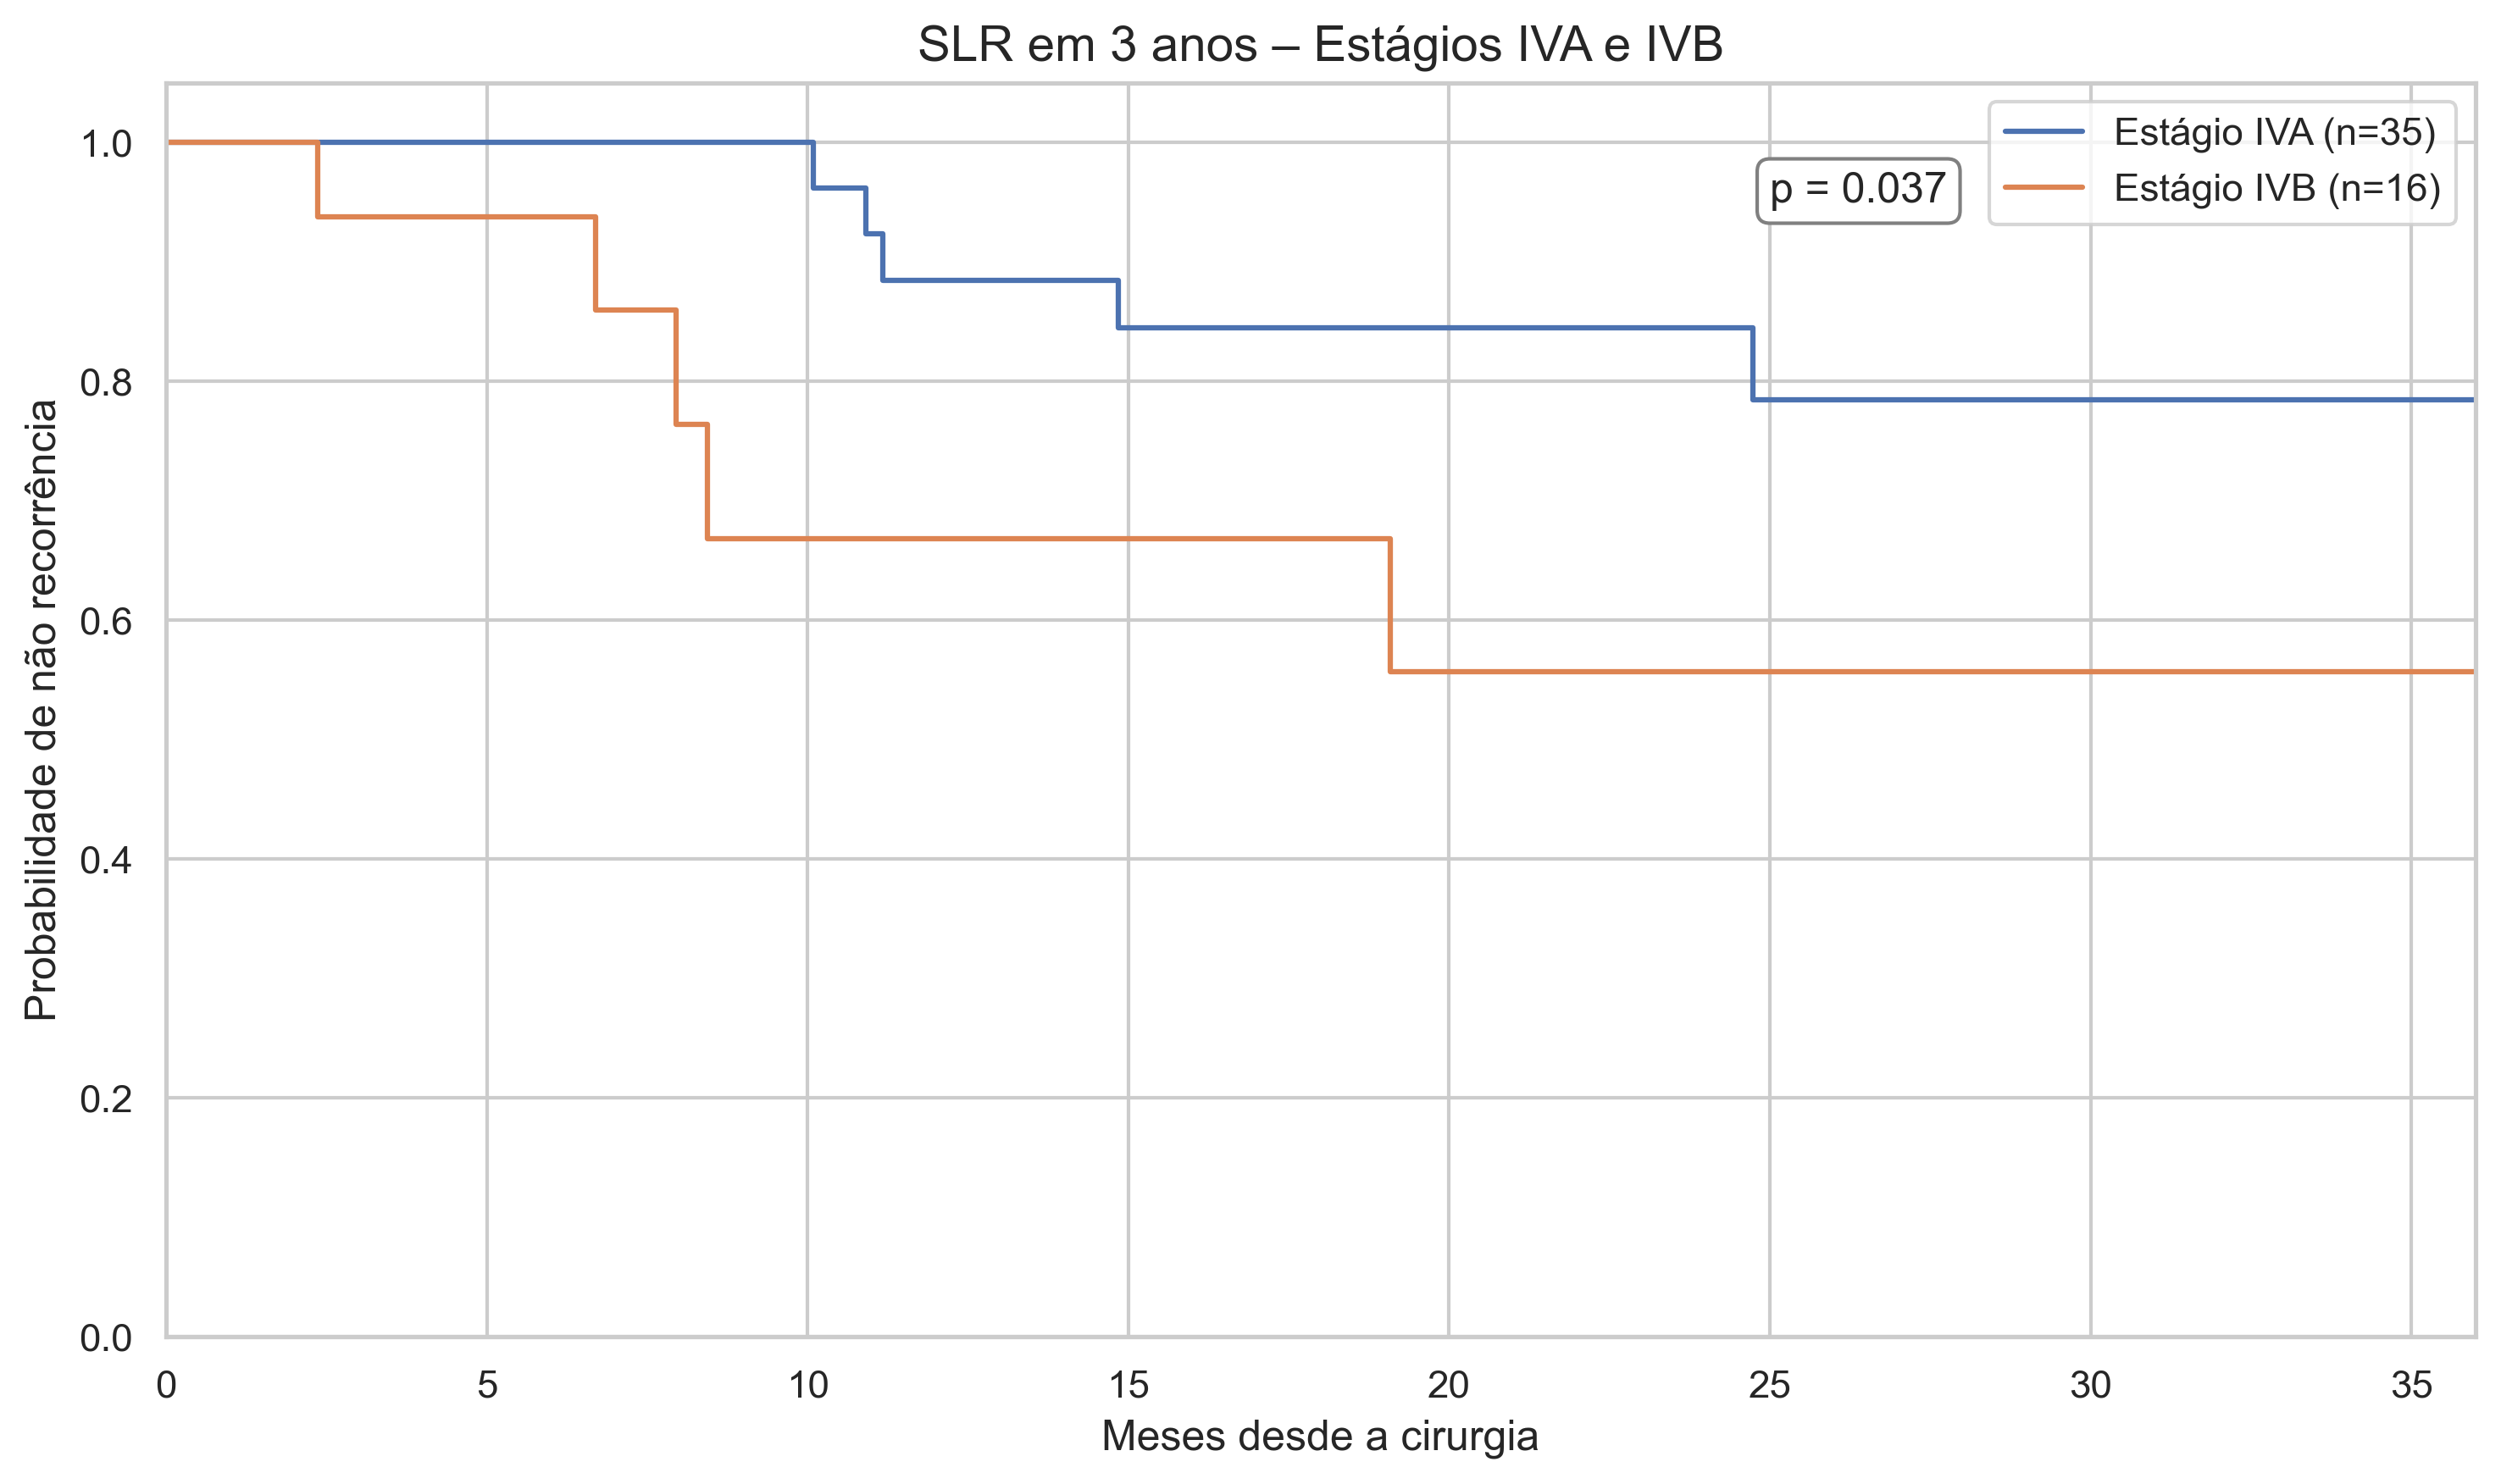

In [ ]:
# Filtrar apenas IVA, IVB
df_4grupos = df_livre_doenca[df_livre_doenca['Stage_8ªed'].isin(['IVA', 'IVB'])].copy()

# Log-rank global
resultado_logrank = multivariate_logrank_test(
    df_4grupos['tempo_slr_meses'],
    df_4grupos['Stage_8ªed'],
    event_observed=df_4grupos['evento_slr']
)
p = resultado_logrank.p_value
p_formatado = f"p = {p:.3f}" if p >= 0.001 else "p < 0.001"

# Plot Kaplan-Meier
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

# Curvas para cada estágio
for estagio in ['IVA', 'IVB']:
    dados = df_4grupos[df_4grupos['Stage_8ªed'] == estagio]
    kmf.fit(dados['tempo_slr_meses'], dados['evento_slr'], label=f'Estágio {estagio} (n={len(dados)})')
    kmf.plot_survival_function(ci_show=False)

# Estilização
plt.title("SLR em 3 anos – Estágios IVA e IVB")
plt.xlabel("Meses desde a cirurgia")
plt.ylabel("Probabilidade de não recorrência")
plt.xlim(0, 36)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

# p-valor no gráfico
plt.text(
    25, 0.95,
    p_formatado,
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------

In [ ]:
df_cox = df_livre_doenca.copy()

In [ ]:
#sobrevida global

In [ ]:
df_cox.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mv                           51 non-null     int64         
 1   age                          51 non-null     int64         
 2   sex                          51 non-null     object        
 3   IMC                          49 non-null     object        
 4   tabagismo                    51 non-null     object        
 5   etlilismo                    51 non-null     object        
 6   pack.year                    38 non-null     datetime64[ns]
 7   Data_bx                      51 non-null     datetime64[ns]
 8   Data_1ªconsulta_ccp          51 non-null     datetime64[ns]
 9   Data_cirurgia                51 non-null     datetime64[ns]
 10  Subsítio                     51 non-null     object        
 11  EC                           51 non-null     ob

## Sobrevida global modelo de regressão de cox

#### O que irá para o tratalho (arquivo .tex = "cox_1") - uni e multivariada para SObrevida global

In [ ]:
#obs: Existe um vies de confusão em tempo entre cx e rt. EM que a demora para rt pode ser um fator protetor. isso pode ser justificado pois pacientes com pior prognostico estão sendo enviados mais rapido para rt.


In [ ]:
df_cox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mv                           51 non-null     int64         
 1   age                          51 non-null     int64         
 2   sex                          51 non-null     object        
 3   IMC                          49 non-null     object        
 4   tabagismo                    51 non-null     object        
 5   etlilismo                    51 non-null     object        
 6   pack.year                    38 non-null     datetime64[ns]
 7   Data_bx                      51 non-null     datetime64[ns]
 8   Data_1ªconsulta_ccp          51 non-null     datetime64[ns]
 9   Data_cirurgia                51 non-null     datetime64[ns]
 10  Subsítio                     51 non-null     object        
 11  EC                           51 non-null     ob

In [ ]:
#transformar "," e ""." na coluna IMC"
# Trocar vírgula por ponto
df_cox['IMC'] = df_cox['IMC'].astype(str).str.replace(',', '.', regex=False)

# Converter para float
df_cox['IMC'] = df_cox['IMC'].astype(float)


In [ ]:
df_ivonly = df_cox[df_cox['Stage_8ªed'].isin(['IVA', 'IVB'])].copy()

# Reordenar para IVA como referência
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].astype('category')
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].cat.reorder_categories(['IVA', 'IVB'], ordered=False)

# Dummies
dummies_stage = pd.get_dummies(df_ivonly['Stage_8ªed'], prefix='Stage', drop_first=True)
dummies_margem = pd.get_dummies(df_ivonly['MARGEM'], prefix='MARGEM', drop_first=True)
dummies_qt = pd.get_dummies(df_ivonly['QT_ADJUVANTE'], prefix='QT_ADJUVANTE', drop_first=True)
dummies_ipn = pd.get_dummies(df_ivonly['INVASÃO_PERINEURAL'], prefix='INVASÃO_PERINEURAL', drop_first=True)
dummies_ial = pd.get_dummies(df_ivonly['INVASÃO_ANGIOLINFATICA'], prefix='INVASÃO_ANGIOLINFATICA', drop_first=True)
dummies_age_bins2 = pd.get_dummies(df_ivonly['age_bins2'], prefix='age_bins2', drop_first=True)
dummies_sex = pd.get_dummies(df_ivonly['sex'], prefix='sex', drop_first=True)
dummies_tabagismo = pd.get_dummies(df_ivonly['tabagismo'], prefix='tabagismo', drop_first=True)
dummies_etlilismo = pd.get_dummies(df_ivonly['etlilismo'], prefix='etilismo', drop_first=True)

# Montar base
df_model_ivonly = pd.concat([
    df_ivonly[[
        'Bx_consulta',
        'Consulta_cirurgia',
        'Cirurgia_rdt',
        'sobrevida_dias',
       # 'DOI(mm)',
      #  'TAMANHO(cm)',
        'STATUS _OBREVIVÊNCIA',
       'IMC',

    ]],
    dummies_stage,
    dummies_margem,
    dummies_qt,
    dummies_ipn,
    dummies_ial,
    dummies_age_bins2,
    dummies_sex,
    dummies_tabagismo,
    dummies_etlilismo



], axis=1).dropna()

# Ajustar modelo
from lifelines import CoxPHFitter
cph_ivonly = CoxPHFitter()
cph_ivonly.fit(df_model_ivonly, duration_col='sobrevida_dias', event_col='STATUS _OBREVIVÊNCIA')
cph_ivonly.print_summary()


<lifelines.CoxPHFitter: fitted with 49 total observations, 11 right-censored observations>
             duration col = 'sobrevida_dias'
                event col = 'STATUS _OBREVIVÊNCIA'
      baseline estimation = breslow
   number of observations = 49
number of events observed = 38
   partial log-likelihood = -99.16
         time fit was run = 2025-09-15 16:03:02 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
Bx_consulta                 0.00      1.00      0.01           -0.01            0.02                0.99                1.02
Consulta_cirurgia          -0.00      1.00      0.01           -0.02            0.01                0.99                1.01
Cirurgia_rdt               -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99
IMC                         0.03      1.03      0.04           -0.06            0.11                0.94                1.12
Stage_IVB                   0.69      2.00      0.58           -0.44            1.82                0.64                6.20
MARGEM_livre               -1.40      0.25      0.59           -2.57           -0.24                0.08                0.79
QT_ADJUVANTE_sim           -0.62      0.54      0.46           -1.52            0.28                0.22                1.33
INVASÃO_PERINEURAL_sim      0.12      1.13      0.54           -0.94            1.18                0.39                3.26
INVASÃO_ANGIOLINFATICA_sim -0.58      0.56      0.66           -1.88            0.71                0.15                2.04
age_bins2_≥61               0.22      1.24      0.45           -0.67            1.10                0.51                3.00
sex_Masculino              -0.40      0.67      0.55           -1.48            0.67                0.23                1.96
tabagismo_sim               0.84      2.32      0.82           -0.77            2.46                0.46               11.65
etilismo_sim               -0.25      0.78      0.71           -1.64            1.15                0.19                3.16

                            cmp to     z    p  -log2(p)
covariate                                              
Bx_consulta                   0.00  0.60 0.55      0.87
Consulta_cirurgia             0.00 -0.20 0.84      0.24
Cirurgia_rdt                  0.00 -2.70 0.01      7.17
IMC                           0.00  0.62 0.54      0.89
Stage_IVB                     0.00  1.20 0.23      2.12
MARGEM_livre                  0.00 -2.36 0.02      5.79
QT_ADJUVANTE_sim              0.00 -1.34 0.18      2.48
INVASÃO_PERINEURAL_sim        0.00  0.22 0.83      0.27
INVASÃO_ANGIOLINFATICA_sim    0.00 -0.88 0.38      1.41
age_bins2_≥61                 0.00  0.48 0.63      0.66
sex_Masculino                 0.00 -0.74 0.46      1.11
tabagismo_sim                 0.00  1.03 0.30      1.71
etilismo_sim                  0.00 -0.35 0.73      0.46
---
Concordance = 0.66
Partial AIC = 224.32
log-likelihood ratio test = 18.60 on 13 df
-log2(p) of ll-ratio test = 2.88

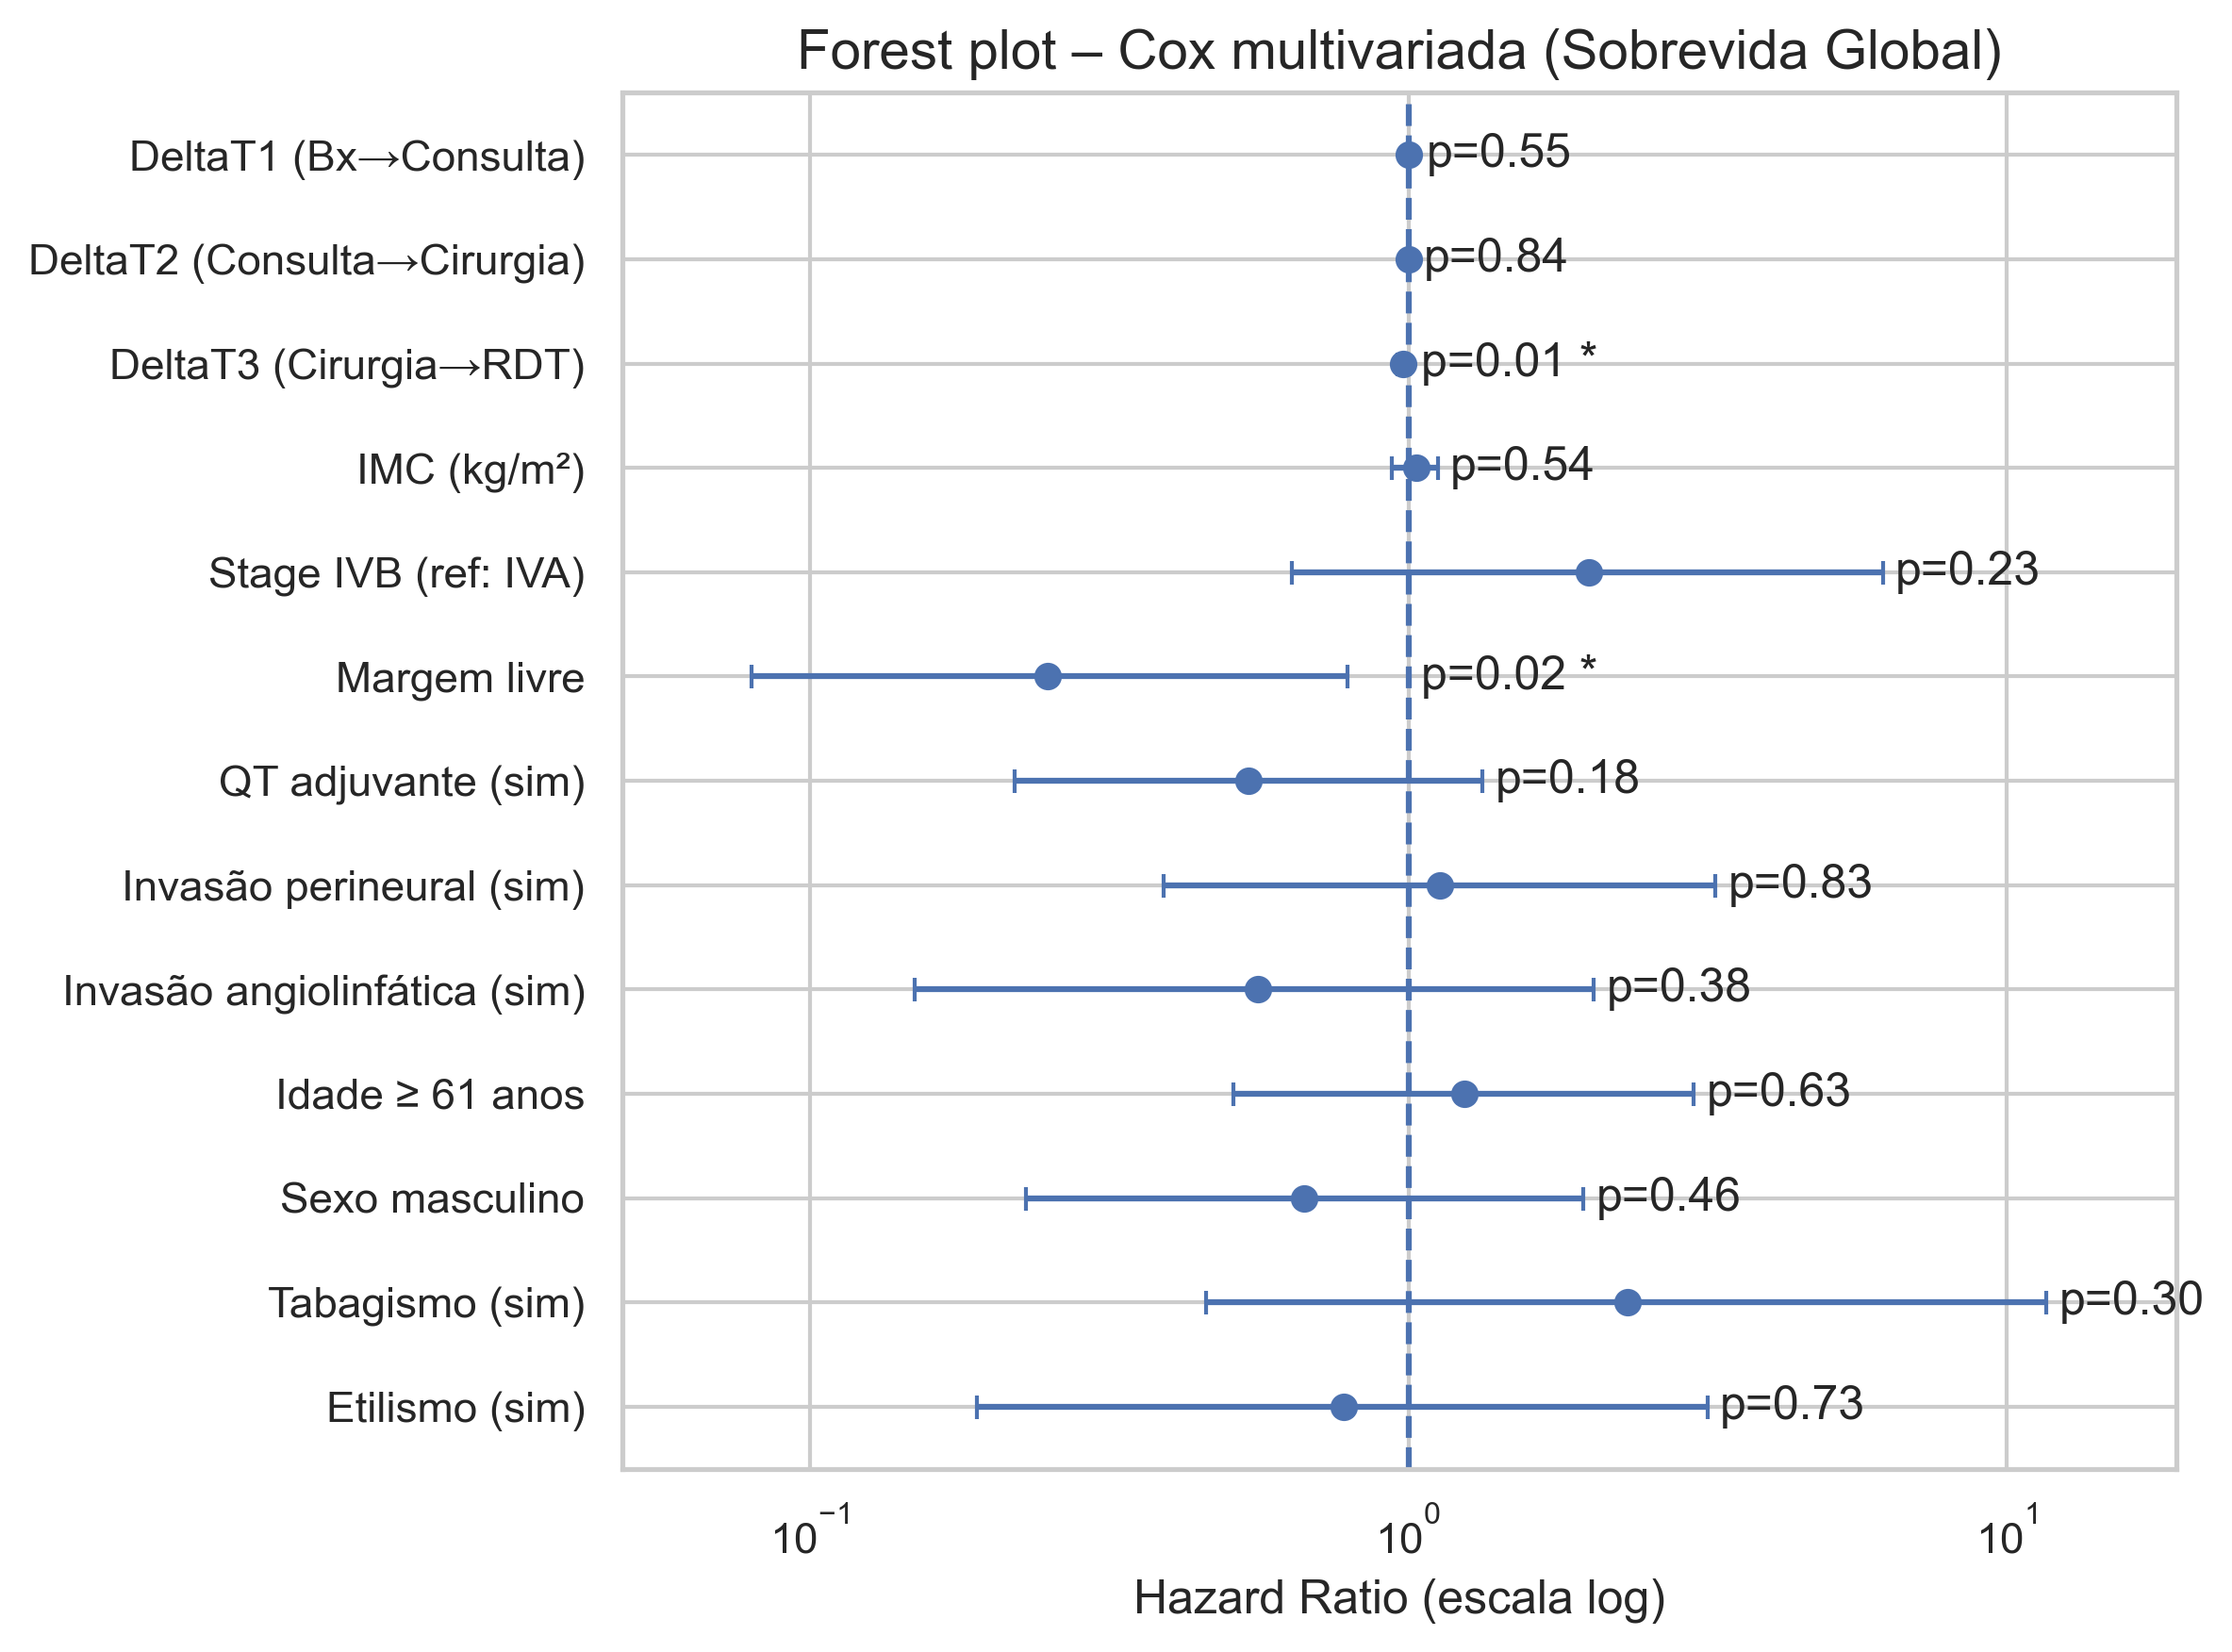

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Dados (multivariada OS)
# =========================
variaveis = [
    "DeltaT1 (Bx→Consulta)", "DeltaT2 (Consulta→Cirurgia)", "DeltaT3 (Cirurgia→RDT)",
    "IMC (kg/m²)", "Stage IVB (ref: IVA)", "Margem livre",
    "QT adjuvante (sim)", "Invasão perineural (sim)", "Invasão angiolinfática (sim)",
    "Idade ≥ 61 anos", "Sexo masculino", "Tabagismo (sim)", "Etilismo (sim)"
]

HR =  [1.00, 1.00, 0.98, 1.03, 2.00, 0.25, 0.54, 1.13, 0.56, 1.24, 0.67, 2.32, 0.78]
LCL = [0.99, 0.99, 0.96, 0.94, 0.64, 0.08, 0.22, 0.39, 0.15, 0.51, 0.23, 0.46, 0.19]
UCL = [1.02, 1.01, 0.99, 1.12, 6.20, 0.79, 1.33, 3.26, 2.04, 3.00, 1.96, 11.65, 3.16]
pvals = [0.55, 0.84, 0.01, 0.54, 0.23, 0.02, 0.18, 0.83, 0.38, 0.63, 0.46, 0.30, 0.73]

# (Opcional) ordenar por HR (deixe False para manter sua ordem original)
ordenar_por_HR = False
if ordenar_por_HR:
    idx = np.argsort(HR)
    variaveis = [variaveis[i] for i in idx]
    HR  = [HR[i] for i in idx]
    LCL = [LCL[i] for i in idx]
    UCL = [UCL[i] for i in idx]
    pvals = [pvals[i] for i in idx]

y = np.arange(len(variaveis))

# =========================
# Plot
# =========================
plt.figure(figsize=(8, 6))

# Barras de erro (IC95%)
xerr_lower = np.array(HR) - np.array(LCL)
xerr_upper = np.array(UCL) - np.array(HR)
plt.errorbar(HR, y, xerr=[xerr_lower, xerr_upper], fmt='o', capsize=3)

# Linha de referência HR=1
plt.axvline(1, linestyle='--')

# Eixo Y com nomes das variáveis (invertido para a 1ª aparecer no topo)
plt.yticks(y, variaveis)
plt.gca().invert_yaxis()

# Escala log – melhor para HRs pequenos/grandes
plt.xscale('log')

# Rótulos e título
plt.xlabel("Hazard Ratio (escala log)")
plt.title("Forest plot – Cox multivariada (Sobrevida Global)")

# Anotar p-valores à direita
for i, p in enumerate(pvals):
    txt = f"p={p:.2f}" if p >= 0.001 else "p<0.001"
    # marca com * se p<0.05
    star = " *" if p < 0.05 else ""
    plt.text(UCL[i]*1.05 if UCL[i] > 1 else 1.05, y[i], txt + star, va='center')

# Margens para não cortar anotações
plt.margins(x=0.1)
plt.tight_layout()

# Salvar
plt.savefig("forestplot_os_multivariada.png", dpi=300)
plt.show()



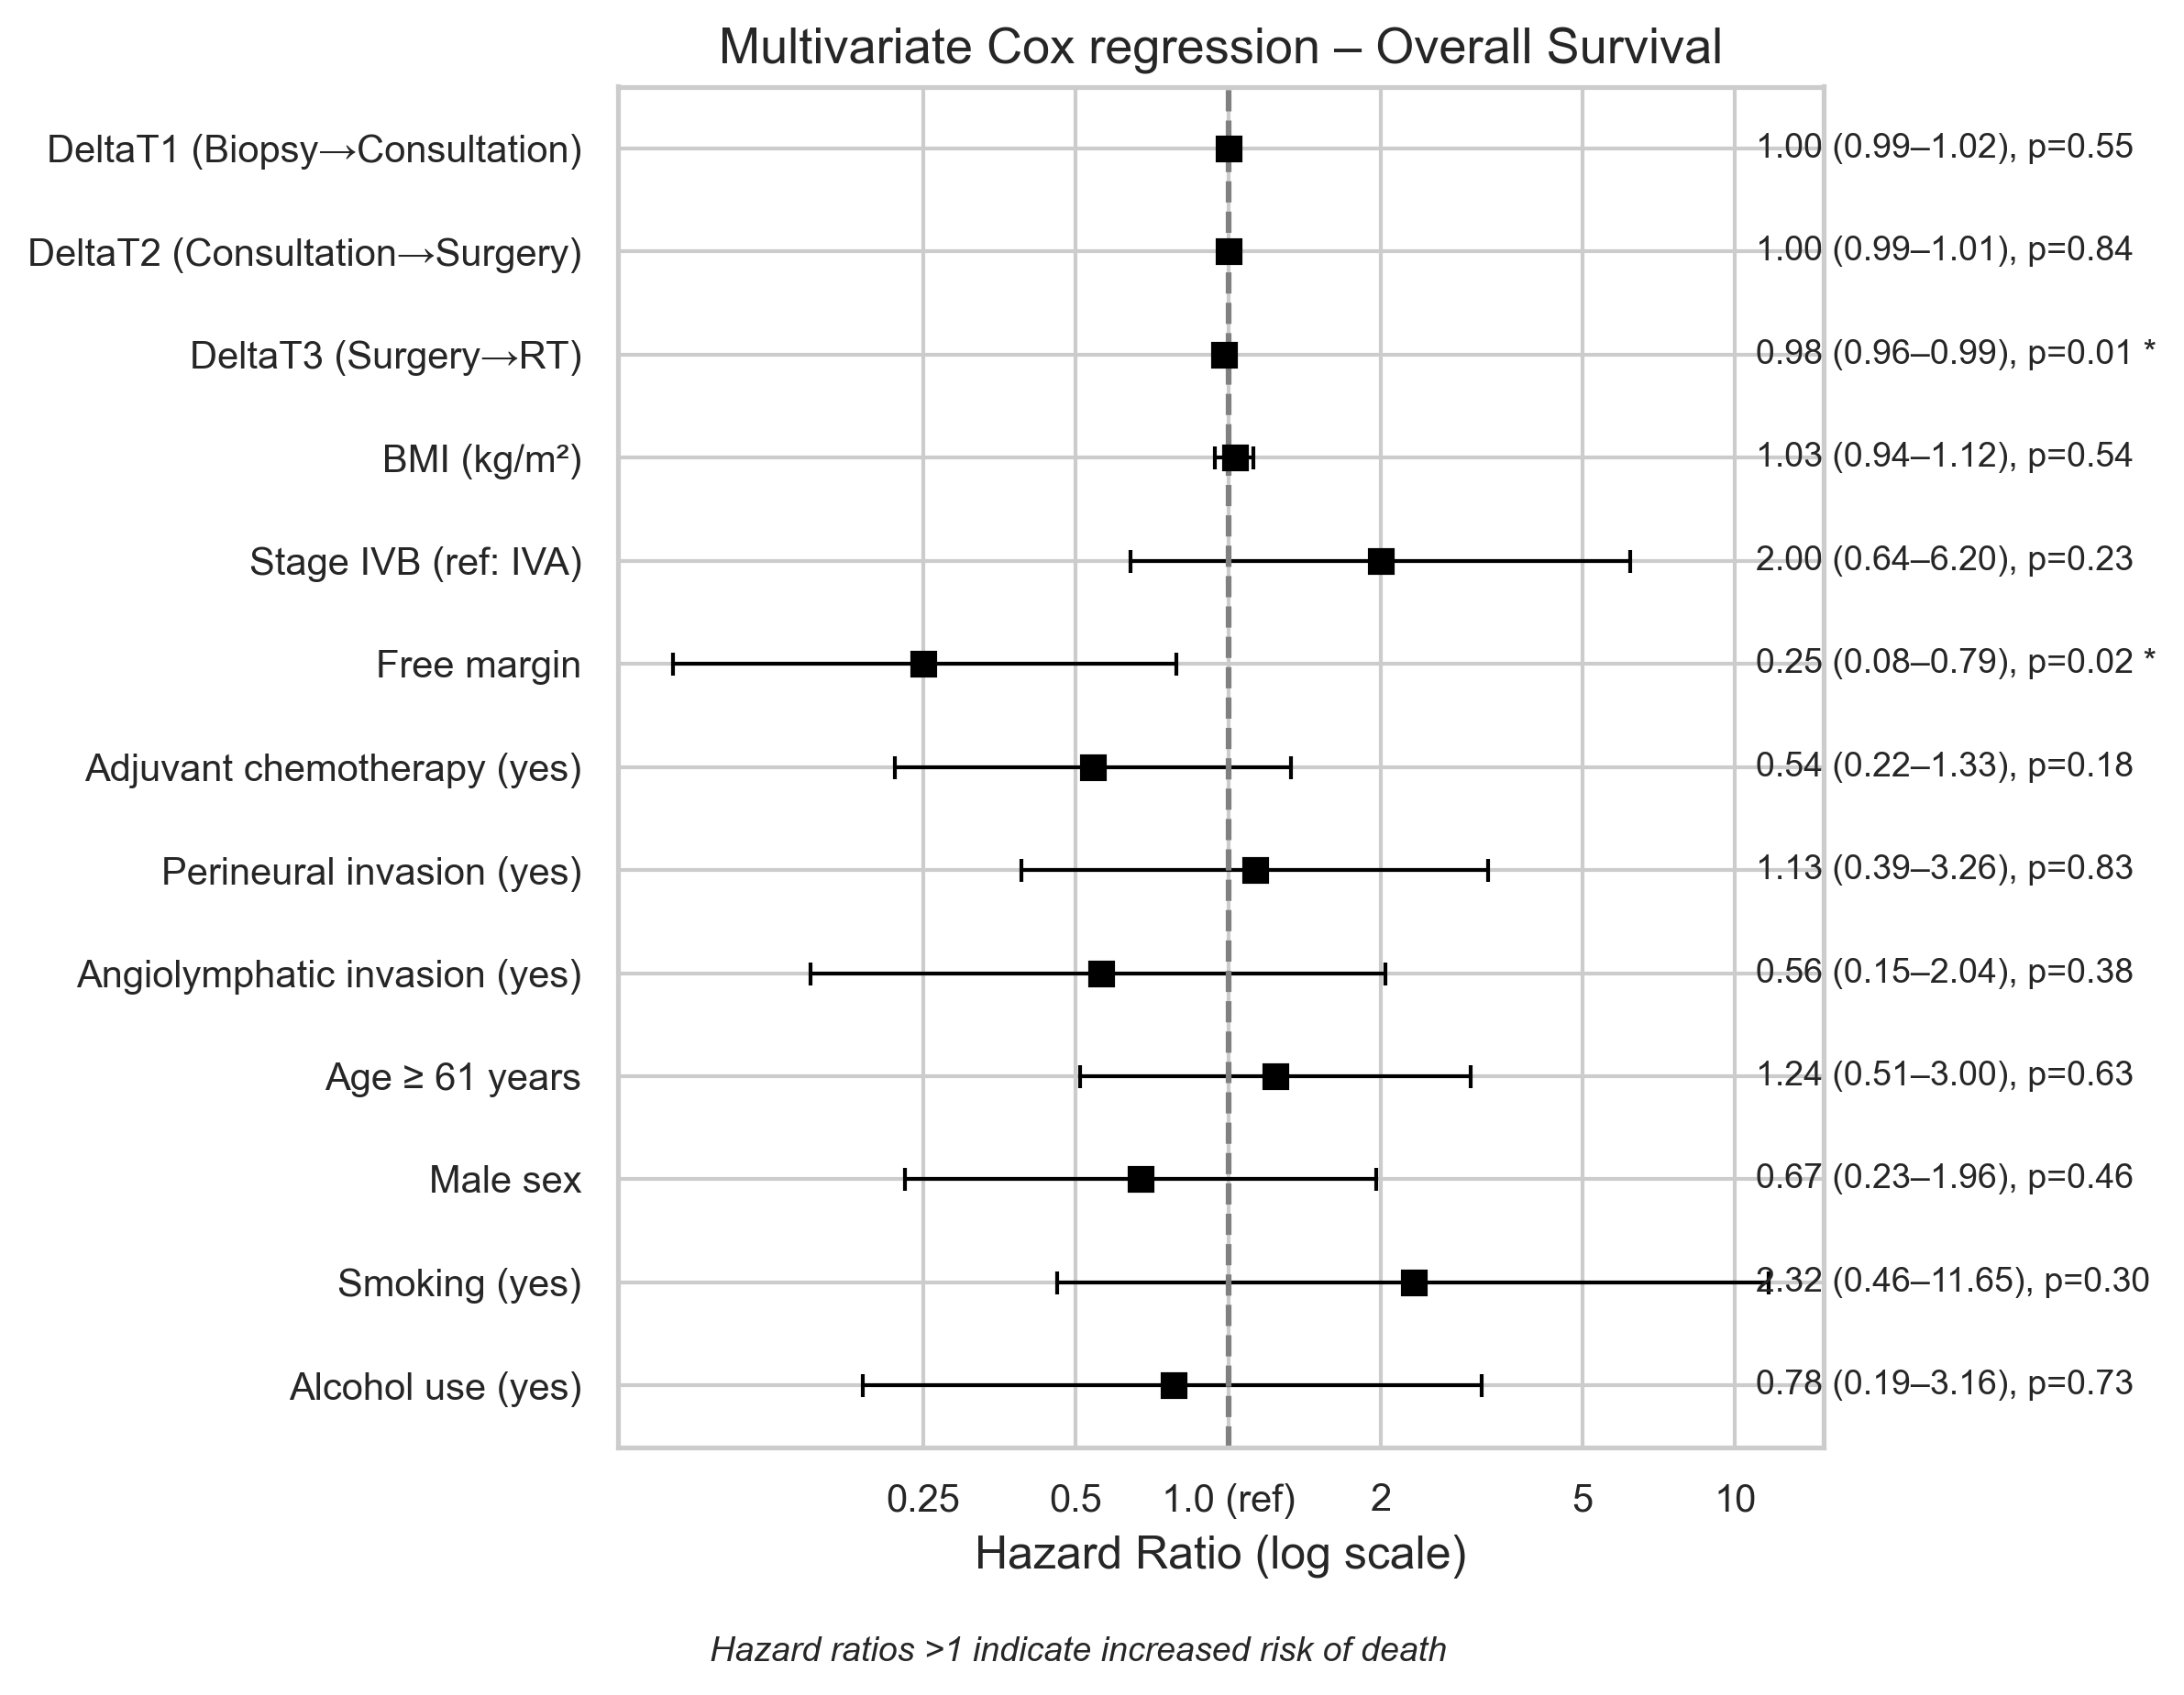

In [ ]:

# =========================
# Data (Multivariate OS)
# =========================
variables = [
    "DeltaT1 (Biopsy→Consultation)",
    "DeltaT2 (Consultation→Surgery)",
    "DeltaT3 (Surgery→RT)",
    "BMI (kg/m²)",
    "Stage IVB (ref: IVA)",
    "Free margin",
    "Adjuvant chemotherapy (yes)",
    "Perineural invasion (yes)",
    "Angiolymphatic invasion (yes)",
    "Age ≥ 61 years",
    "Male sex",
    "Smoking (yes)",
    "Alcohol use (yes)"
]

HR  = [1.00, 1.00, 0.98, 1.03, 2.00, 0.25, 0.54, 1.13, 0.56, 1.24, 0.67, 2.32, 0.78]
LCL = [0.99, 0.99, 0.96, 0.94, 0.64, 0.08, 0.22, 0.39, 0.15, 0.51, 0.23, 0.46, 0.19]
UCL = [1.02, 1.01, 0.99, 1.12, 6.20, 0.79, 1.33, 3.26, 2.04, 3.00, 1.96, 11.65, 3.16]
pvals = [0.55, 0.84, 0.01, 0.54, 0.23, 0.02, 0.18, 0.83, 0.38, 0.63, 0.46, 0.30, 0.73]

y = np.arange(len(variables))

plt.figure(figsize=(8, 6))

# Forest plot
plt.errorbar(HR, y,
             xerr=[np.array(HR)-np.array(LCL), np.array(UCL)-np.array(HR)],
             fmt='s', color='black', ecolor='black', elinewidth=1, capsize=3)

# Linha de referência HR=1
plt.axvline(1, color='gray', linestyle='--')

# Eixo Y
plt.yticks(y, variables, fontsize=10)
plt.gca().invert_yaxis()

# Eixo X ajustado
plt.xscale("log")
plt.xticks([0.25, 0.5, 1, 2, 5, 10],
           ["0.25", "0.5", "1.0 (ref)", "2", "5", "10"], fontsize=10)
plt.xlabel("Hazard Ratio (log scale)", fontsize=12)
plt.title("Multivariate Cox regression – Overall Survival", fontsize=13)

# Anotar HR + IC95% + p-value
for i, (hr, lcl, ucl, p) in enumerate(zip(HR, LCL, UCL, pvals)):
    txt = f"{hr:.2f} ({lcl:.2f}–{ucl:.2f}), p={p:.2f}"
    if p < 0.05:
        txt += " *"
    plt.text(11, i, txt, va='center', fontsize=9)

# Nota discreta no rodapé
plt.figtext(0.5, -0.02, "Hazard ratios >1 indicate increased risk of death",
            ha="center", fontsize=9, style="italic")

plt.tight_layout()
plt.savefig("forestplot_os_multivariate_clean_axis.tiff", dpi=600, bbox_inches="tight")
plt.show()



In [ ]:
# Lista de todas as covariáveis (exceto tempo e evento)
covariaveis = [col for col in df_model_ivonly.columns if col not in ['sobrevida_dias','STATUS _OBREVIVÊNCIA']]

resultados = []

for var in covariaveis:
    cph_uni = CoxPHFitter()
    cph_uni.fit(
        df_model_ivonly[['sobrevida_dias','STATUS _OBREVIVÊNCIA', var]],
        duration_col='sobrevida_dias',
        event_col='STATUS _OBREVIVÊNCIA'
    )
    resumo = cph_uni.summary.copy()
    resumo['variavel'] = var
    resultados.append(resumo)

# Concatenar todos os resultados
import pandas as pd
univariada_df = pd.concat(resultados)

# Selecionar colunas de interesse
univariada_df = univariada_df[['variavel','coef','exp(coef)','p','exp(coef) lower 95%','exp(coef) upper 95%']]
print(univariada_df)


                                              variavel      coef  exp(coef)  \
covariate                                                                     
Bx_consulta                                Bx_consulta  0.002754   1.002758   
Consulta_cirurgia                    Consulta_cirurgia  0.000333   1.000333   
Cirurgia_rdt                              Cirurgia_rdt -0.015864   0.984262   
IMC                                                IMC  0.030906   1.031388   
Stage_IVB                                    Stage_IVB  0.391810   1.479656   
MARGEM_livre                              MARGEM_livre -0.548105   0.578044   
QT_ADJUVANTE_sim                      QT_ADJUVANTE_sim -0.186850   0.829568   
INVASÃO_PERINEURAL_sim          INVASÃO_PERINEURAL_sim  0.567835   1.764443   
INVASÃO_ANGIOLINFATICA_sim  INVASÃO_ANGIOLINFATICA_sim  0.397189   1.487637   
age_bins2_≥61                            age_bins2_≥61  0.198991   1.220171   
sex_Masculino                            sex_Masculi

________________________________

## sobrevida livre de doença modelo de regressão de cox

In [ ]:
#### O que irá para o tratalho (arquivo .tex = "cox_4") - uni e multivariada para SObrevida global

In [ ]:
df_ivonly = df_cox[df_cox['Stage_8ªed'].isin(['IVA', 'IVB'])].copy()

# Reordenar para IVA como referência
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].astype('category')
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].cat.reorder_categories(['IVA', 'IVB'], ordered=False)


# Converter tempo de SLR para dias
df_ivonly['tempo_slr_dias'] = df_ivonly['tempo_slr_meses'] * 30


#### O que irá para o tratalho (arquivo .tex = "cox_2") - uni e multivariada para SObrevida livre de recorrencia

In [ ]:
df_ivonly = df_cox[df_cox['Stage_8ªed'].isin(['IVA', 'IVB'])].copy()

# Reordenar para IVA como referência
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].astype('category')
df_ivonly['Stage_8ªed'] = df_ivonly['Stage_8ªed'].cat.reorder_categories(['IVA', 'IVB'], ordered=False)



# Converter tempo de SLR para dias
df_ivonly['tempo_slr_dias'] = df_ivonly['tempo_slr_meses'] * 30

# Criar dummies
dummies_stage = pd.get_dummies(df_ivonly['Stage_8ªed'], prefix='Stage', drop_first=True)
dummies_margem = pd.get_dummies(df_ivonly['MARGEM'], prefix='MARGEM', drop_first=True)
dummies_qt = pd.get_dummies(df_ivonly['QT_ADJUVANTE'], prefix='QT_ADJUVANTE', drop_first=True)
dummies_ipn = pd.get_dummies(df_ivonly['INVASÃO_PERINEURAL'], prefix='INVASÃO_PERINEURAL', drop_first=True)
dummies_ial = pd.get_dummies(df_ivonly['INVASÃO_ANGIOLINFATICA'], prefix='INVASÃO_ANGIOLINFATICA', drop_first=True)
dummies_age_bins2 = pd.get_dummies(df_ivonly['age_bins2'], prefix='age_bins2', drop_first=True)
dummies_sex = pd.get_dummies(df_ivonly['sex'], prefix='sex', drop_first=True)
dummies_tabagismo = pd.get_dummies(df_ivonly['tabagismo'], prefix='tabagismo', drop_first=True)
dummies_etlilismo = pd.get_dummies(df_ivonly['etlilismo'], prefix='etilismo', drop_first=True)

# Montar base para regressão de Cox (SLR)
df_model_slr = pd.concat([
    df_ivonly[[
        'Bx_consulta',
        'Consulta_cirurgia',
        'Cirurgia_rdt',
        'tempo_slr_dias',
       # 'DOI(mm)',
      #  'TAMANHO(cm)',
        'evento_slr',
       'IMC',

    ]],
    dummies_stage,
    dummies_margem,
    dummies_qt,
    dummies_ipn,
    dummies_ial,
    dummies_age_bins2,
    dummies_sex,
    dummies_tabagismo,
    dummies_etlilismo



], axis=1).dropna()

# Ajustar modelo de Cox
from lifelines import CoxPHFitter
cph_slr = CoxPHFitter()
cph_slr.fit(df_model_slr, duration_col='tempo_slr_dias', event_col='evento_slr')
cph_slr.print_summary()


<lifelines.CoxPHFitter: fitted with 49 total observations, 39 right-censored observations>
             duration col = 'tempo_slr_dias'
                event col = 'evento_slr'
      baseline estimation = breslow
   number of observations = 49
number of events observed = 10
   partial log-likelihood = -17.41
         time fit was run = 2025-09-15 16:03:03 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
Bx_consulta                 0.04      1.04      0.03           -0.02            0.09                0.98                1.09
Consulta_cirurgia           0.06      1.07      0.03            0.01            0.12                1.01                1.13
Cirurgia_rdt                0.03      1.03      0.03           -0.03            0.09                0.97                1.10
IMC                         0.20      1.22      0.20           -0.19            0.59                0.83                1.80
Stage_IVB                   4.46     86.87      1.66            1.20            7.73                3.33             2268.28
MARGEM_livre               -2.88      0.06      3.18           -9.12            3.36                0.00               28.75
QT_ADJUVANTE_sim            0.26      1.30      1.29           -2.26            2.78                0.10               16.20
INVASÃO_PERINEURAL_sim      4.40     81.58      2.46           -0.42            9.22                0.66            10129.43
INVASÃO_ANGIOLINFATICA_sim -4.92      0.01      2.87          -10.54            0.70                0.00                2.02
age_bins2_≥61               3.16     23.47      1.88           -0.53            6.84                0.59              938.95
sex_Masculino              -4.12      0.02      1.82           -7.69           -0.54                0.00                0.58
tabagismo_sim              -4.31      0.01      2.68           -9.58            0.95                0.00                2.58
etilismo_sim                6.63    760.70      2.73            1.28           11.98                3.61            1.60e+05

                            cmp to     z    p  -log2(p)
covariate                                              
Bx_consulta                   0.00  1.35 0.18      2.49
Consulta_cirurgia             0.00  2.18 0.03      5.08
Cirurgia_rdt                  0.00  0.97 0.33      1.59
IMC                           0.00  1.01 0.31      1.67
Stage_IVB                     0.00  2.68 0.01      7.09
MARGEM_livre                  0.00 -0.90 0.37      1.45
QT_ADJUVANTE_sim              0.00  0.20 0.84      0.25
INVASÃO_PERINEURAL_sim        0.00  1.79 0.07      3.76
INVASÃO_ANGIOLINFATICA_sim    0.00 -1.71 0.09      3.53
age_bins2_≥61                 0.00  1.68 0.09      3.42
sex_Masculino                 0.00 -2.26 0.02      5.38
tabagismo_sim                 0.00 -1.61 0.11      3.21
etilismo_sim                  0.00  2.43 0.02      6.05
---
Concordance = 0.94
Partial AIC = 60.82
log-likelihood ratio test = 34.63 on 13 df
-log2(p) of ll-ratio test = 10.02

In [ ]:
df_ivonly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mv                           51 non-null     int64         
 1   age                          51 non-null     int64         
 2   sex                          51 non-null     object        
 3   IMC                          49 non-null     float64       
 4   tabagismo                    51 non-null     object        
 5   etlilismo                    51 non-null     object        
 6   pack.year                    38 non-null     datetime64[ns]
 7   Data_bx                      51 non-null     datetime64[ns]
 8   Data_1ªconsulta_ccp          51 non-null     datetime64[ns]
 9   Data_cirurgia                51 non-null     datetime64[ns]
 10  Subsítio                     51 non-null     object        
 11  EC                           51 non-null     ob

In [ ]:



# Definir variáveis candidatas (exemplo)
covariaveis = [
    "Bx_consulta",
    "Consulta_cirurgia",
    "Cirurgia_rdt",
    "IMC",
    "Stage_8ªed",
    "MARGEM",
    "QT_ADJUVANTE",
    "INVASÃO_PERINEURAL",
    "INVASÃO_ANGIOLINFATICA",
    "age_bins2",
    "sex",
    "tabagismo",
    "etlilismo"
]

resultados = []

for var in covariaveis:
    df_tmp = df_ivonly[[var, "tempo_slr_dias", "evento_slr"]].dropna()

    # Criar dummies se for categórica
    if df_tmp[var].dtype == "object" or str(df_tmp[var].dtype).startswith("category"):
        df_tmp = pd.get_dummies(df_tmp, columns=[var], drop_first=True)

    for col in df_tmp.columns:
        if col not in ["tempo_slr_dias", "evento_slr"]:
            cph = CoxPHFitter()
            cph.fit(df_tmp[["tempo_slr_dias","evento_slr",col]],
                    duration_col="tempo_slr_dias", event_col="evento_slr")
            resumo = cph.summary.reset_index()
            resumo["variavel"] = col
            resultados.append(resumo[["variavel","coef","exp(coef)","p","exp(coef) lower 95%","exp(coef) upper 95%"]])

# Concatenar todos os resultados
univariada_slr = pd.concat(resultados, ignore_index=True)
print(univariada_slr)


                      variavel      coef  exp(coef)         p  \
0                  Bx_consulta -0.004548   0.995462  0.654437   
1            Consulta_cirurgia  0.011410   1.011475  0.172543   
2                 Cirurgia_rdt -0.000309   0.999691  0.972332   
3                          IMC  0.024849   1.025160  0.633695   
4               Stage_8ªed_IVB  1.245603   3.475029  0.050159   
5                 MARGEM_livre -0.649961   0.522066  0.347471   
6             QT_ADJUVANTE_sim  0.512208   1.668972  0.458325   
7       INVASÃO_PERINEURAL_sim  1.418112   4.129319  0.179158   
8   INVASÃO_ANGIOLINFATICA_sim  0.395262   1.484773  0.568942   
9                age_bins2_≥61  1.275736   3.581338  0.064951   
10               sex_Masculino -0.324664   0.722770  0.615693   
11               tabagismo_sim  0.824730   2.281265  0.434142   
12               etlilismo_sim  1.913949   6.779812  0.069748   

    exp(coef) lower 95%  exp(coef) upper 95%  
0              0.975834             1.0154

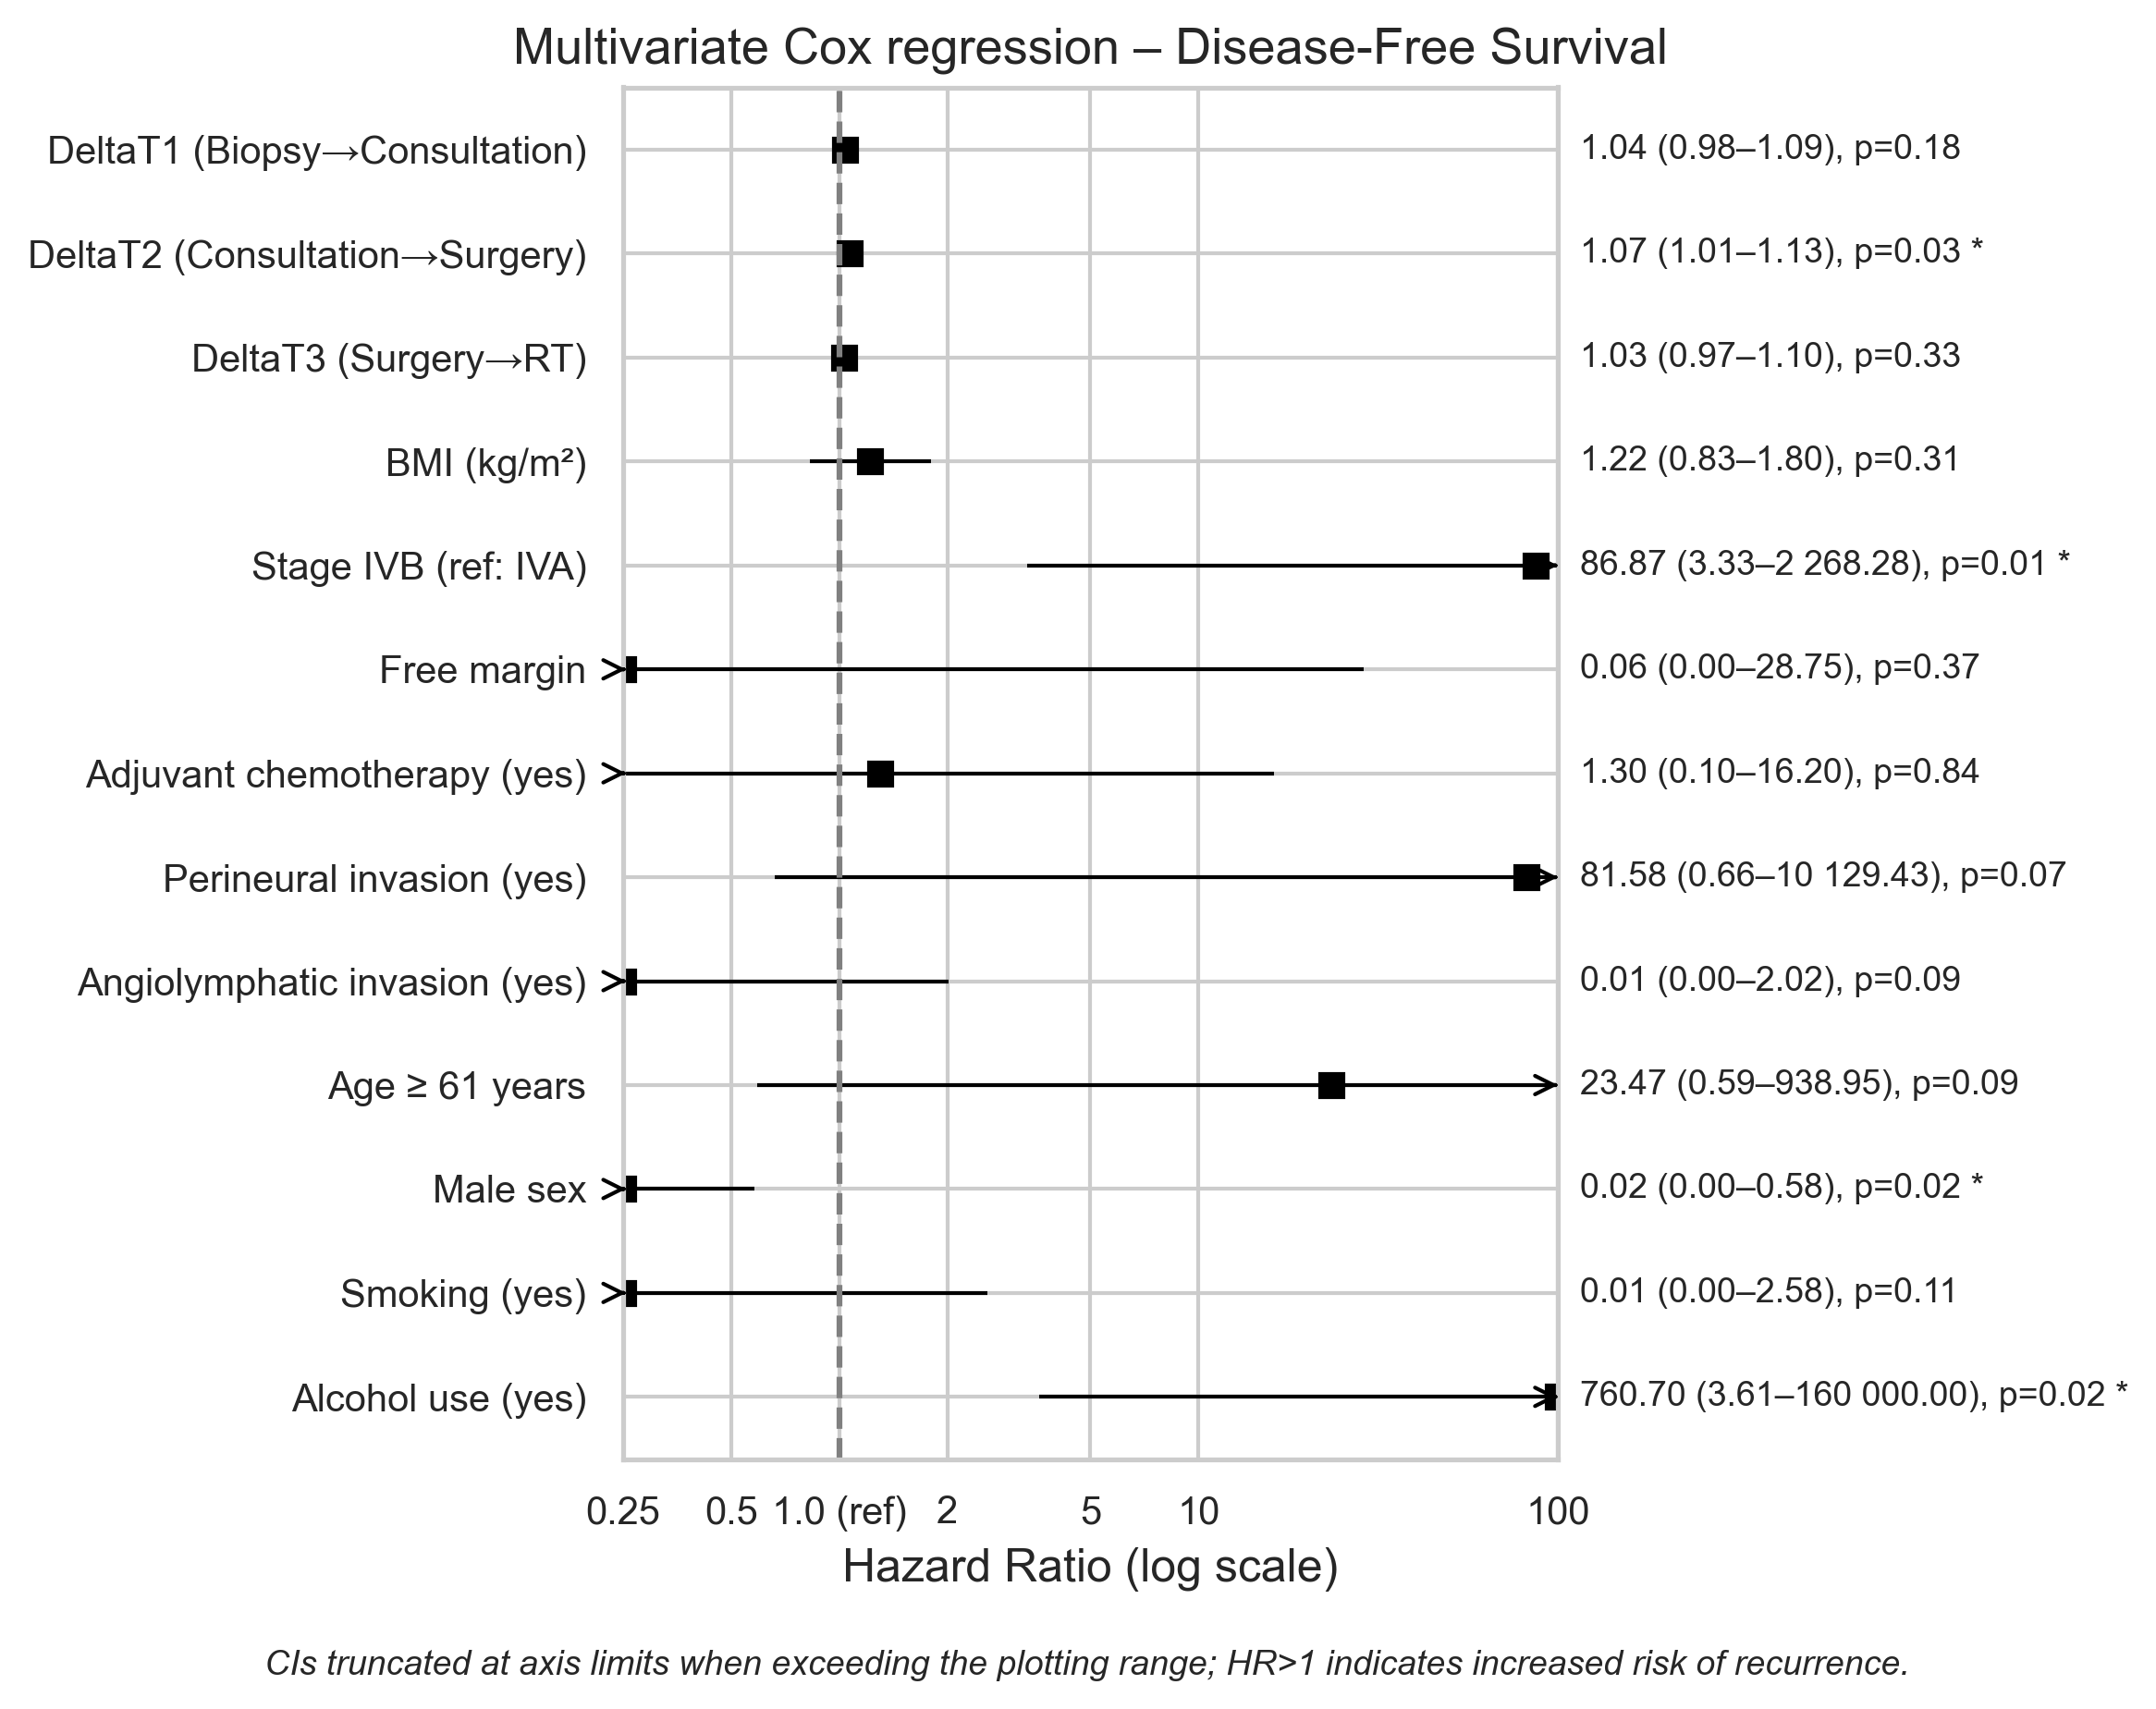

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Data (Multivariate DFS)
# =========================
variables = [
    "DeltaT1 (Biopsy→Consultation)",
    "DeltaT2 (Consultation→Surgery)",
    "DeltaT3 (Surgery→RT)",
    "BMI (kg/m²)",
    "Stage IVB (ref: IVA)",
    "Free margin",
    "Adjuvant chemotherapy (yes)",
    "Perineural invasion (yes)",
    "Angiolymphatic invasion (yes)",
    "Age ≥ 61 years",
    "Male sex",
    "Smoking (yes)",
    "Alcohol use (yes)"
]

HR  = [1.04, 1.07, 1.03, 1.22, 86.87, 0.06, 1.30, 81.58, 0.01, 23.47, 0.02, 0.01, 760.70]
LCL = [0.98, 1.01, 0.97, 0.83, 3.33, 0.00, 0.10, 0.66, 0.00, 0.59, 0.00, 0.00, 3.61]
UCL = [1.09, 1.13, 1.10, 1.80, 2268.28, 28.75, 16.20, 10129.43, 2.02, 938.95, 0.58, 2.58, 160000.00]
p   = [0.18, 0.03, 0.33, 0.31, 0.01, 0.37, 0.84, 0.07, 0.09, 0.09, 0.02, 0.11, 0.02]

y = np.arange(len(variables))

# ====== parâmetros de truncamento ======
xmin, xmax = 0.25, 100  # limite superior em 100 para evitar esmagar
eps = 1e-6

plt.figure(figsize=(8, 6))

# Desenhar barras com truncamento manual e setas
for i, (hr, lcl, ucl) in enumerate(zip(HR, LCL, UCL)):
    # limites “clipped”
    l = max(lcl if lcl>0 else xmin, xmin)
    u = min(ucl, xmax)
    x_center = np.clip(hr, xmin+eps, xmax-eps)

    # barra central (IC95% dentro da janela)
    plt.hlines(i, l, u, colors='black', linewidth=1)
    # marcador do HR
    plt.plot(x_center, i, marker='s', color='black')

    # setas quando IC ultrapassa o eixo
    if lcl < xmin and ucl >= xmin:
        plt.annotate('', xy=(xmin, i), xytext=(xmin*1.02, i),
                     arrowprops=dict(arrowstyle='<-', color='black', lw=1))
    if ucl > xmax and lcl <= xmax:
        plt.annotate('', xy=(xmax, i), xytext=(xmax/1.02, i),
                     arrowprops=dict(arrowstyle='->', color='black', lw=1))

# Linha de referência HR = 1
plt.axvline(1, color='gray', linestyle='--')

# Eixos
plt.yticks(y, variables, fontsize=10)
plt.gca().invert_yaxis()
plt.xscale("log")
plt.xticks([0.25, 0.5, 1, 2, 5, 10, 100],
           ["0.25", "0.5", "1.0 (ref)", "2", "5", "10", "100"], fontsize=10)
plt.xlabel("Hazard Ratio (log scale)", fontsize=12)
plt.title("Multivariate Cox regression – Disease-Free Survival", fontsize=13)

# Texto HR (CI), p ao lado (sem “estourar” a área)
for i, (hr, lcl, ucl, pv) in enumerate(zip(HR, LCL, UCL, p)):
    # formatação numérica (sem notação científica no rótulo)
    def fmt(x):
        return f"{x:,.2f}".replace(",", " ")  # espaço fino
    txt = f"{fmt(hr)} ({fmt(lcl)}–{fmt(ucl)}), p={pv:.2f}"
    if pv < 0.05:
        txt += " *"
    plt.text(xmax*1.15, i, txt, va='center', fontsize=9)

# Notas discretas
plt.figtext(0.5, -0.02, "CIs truncated at axis limits when exceeding the plotting range; HR>1 indicates increased risk of recurrence.",
            ha="center", fontsize=9, style="italic")

plt.xlim(xmin, xmax)
plt.tight_layout()
plt.savefig("forestplot_dfs_multivariate_truncated.tiff", dpi=600, bbox_inches="tight")
plt.show()
